In [ ]:
# Install language detection and NLP tools
!pip install langdetect
!pip install nltk==<version_used_in_pickle>

# Install machine learning and deep learning libraries
!pip install scikit-learn
!pip install transformers torch datasets

# Install topic modeling and specialized libraries
!pip install bertopic

# Upgrade essential Python tools
!pip install --upgrade pip
!pip install --upgrade wheel


In [ ]:
import os
import pickle
import types
import warnings

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP and language processing
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

# WordCloud
from wordcloud import WordCloud, STOPWORDS

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ParameterGrid
from sklearn.metrics import (
    silhouette_score,
    classification_report,
    accuracy_score,
    mean_squared_error,
    r2_score,
    make_scorer,
)
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.base import BaseEstimator, ClassifierMixin

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Specialized models
from xgboost import XGBClassifier, XGBRegressor
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Text processing and topic modeling
import gensim
from gensim import corpora

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# General utilities
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/New_Data/train_reactions_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/New_Data/test_reactions_data.csv")

In [ ]:
train_feature_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/New_Data/train_feature_reactions_data.csv")

In [ ]:
personality_test_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_test_reactions_data.csv")

In [ ]:
personality_train_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_reactions_data.csv")

In [ ]:
#personality_train_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_reactions_feature_data.csv")

In [ ]:
#personality_train_model_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_reactions_model_data.csv")

In [ ]:
train_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

,username
Success_after_5_years,
-1,7082
0,82332
1,5227


In [ ]:
test_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

,username
Success_after_5_years,
-1,3285
0,34775
1,2170


In [ ]:
train_feature_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

,username
Success_after_5_years,
-1,3765
0,41269
1,2437


### Variables Saver

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
personality_test_data = personality_test_data[['username', 'cleaned_reactions', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]
personality_train_data = personality_train_data[['username', 'cleaned_reactions', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]
"""personality_train_model_data = personality_train_model_data[['username', 'cleaned_reactions', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]"""

"personality_train_model_data = personality_train_model_data[['username', 'cleaned_reactions', 'agreeableness', 'openness',\n       'conscientiousness', 'extraversion', 'neuroticism']]"

In [ ]:
test_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,17116,joseph-chen-cmrp-691bb510,👏🏼 I’d like to give a big shoot out to the ent...,0,0,0
1,17116,joseph-chen-cmrp-691bb510,Incredible work by the whole team!\nLesley Haw...,0,0,0
2,17116,joseph-chen-cmrp-691bb510,Canada's Children's Hospital Foundations is HI...,0,0,0
3,17116,joseph-chen-cmrp-691bb510,I’m happy to share that I’m starting a new pos...,0,0,0
4,17116,joseph-chen-cmrp-691bb510,"As a coordinator at Sephora Gold, I’m grateful...",0,0,0
...,...,...,...,...,...,...
40225,8354,steven-wasserman-10084b63,"What an exciting day it was, to celebrate our ...",0,1,0
40226,8354,steven-wasserman-10084b63,In the immortal words of Marv Albért… \nYES AN...,0,1,0
40227,8354,steven-wasserman-10084b63,"Something has authority in your life—work, spo...",0,1,0
40228,8354,steven-wasserman-10084b63,"Planning a wedding is a big deal, but so is pl...",0,1,0


In [ ]:
train_feature_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,1816,kousuke,先日、1年半務めたELSAのカントリーマネージャーを引退する運びとなりました。（引き続き、同...,0,1,0
1,1816,kousuke,Dear Network - \n\nI’m delighted to share that...,0,1,0
2,1816,kousuke,【経産省シリコンバレー拠点 “Japan Innovation Campus” コワーキング...,0,1,0
3,1816,kousuke,COVER Corporation is one of the world's larges...,0,1,0
4,1816,kousuke,COVER Corporation Announces hololive Meet 2024...,0,1,0
...,...,...,...,...,...,...
47466,18190,amanda-negri-69b53763,More hardware for the hard work....and we ain'...,0,0,1
47467,18190,amanda-negri-69b53763,Breaking news… Today we’re welcoming a new VP ...,0,0,1
47468,18190,amanda-negri-69b53763,It was an incredible privilege to work with yo...,0,0,1
47469,18190,amanda-negri-69b53763,Today’s office.,0,0,1


In [ ]:
reactions_df = pd.concat([train_data, test_data], ignore_index=True)
reactions_df

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,6356,josh-rickard,You have (generally) two paths. The more you l...,0,0,0
1,6356,josh-rickard,We're thrilled to present the Swimlane Anchor ...,0,0,0
2,6356,josh-rickard,We need more cybersecurity startups wiling to ...,0,0,0
3,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0
4,6356,josh-rickard,"Yesterday, my tenure at Cofense ended unexpect...",0,0,0
...,...,...,...,...,...,...
134866,8354,steven-wasserman-10084b63,"What an exciting day it was, to celebrate our ...",0,1,0
134867,8354,steven-wasserman-10084b63,In the immortal words of Marv Albért… \nYES AN...,0,1,0
134868,8354,steven-wasserman-10084b63,"Something has authority in your life—work, spo...",0,1,0
134869,8354,steven-wasserman-10084b63,"Planning a wedding is a big deal, but so is pl...",0,1,0


In [ ]:
# Test language detection on a sample
sample_text = reactions_df['cleaned_reactions'].iloc[1]
print(detect(sample_text))  # See if this outputs 'en' for English
sample_text

en


'We\'re thrilled to present the Swimlane Anchor Award to Justin Walker, Senior Engineering Manager at Swimlane. Justin truly embodies our core values. As a "happy innovator," Justin is recognized for his impact on Turbine\'s cloud-native scale and performance capacity.\n\nThank you Justin, for all your continued contributions at Swimlane.\n\nPlease join us in congratulating Justin Walker, our well-deserving Swimlane Anchor Award winner! 🎉'

In [ ]:
# Ensure consistent language detection
DetectorFactory.seed = 42

# Define the function to filter rows with English text
def filter_english_rows(df, column_name):
    # Check if the DataFrame is empty
    if df.empty:
        return df  # Return the empty DataFrame if it's empty

    def is_english(text):
        try:
            return detect(text) == 'en'  # Detect if the text is English
        except Exception:
            return False  # If detection fails, treat as non-English

    # Apply the language detection function to the specified column
    df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)
    df_filtered = df[df['is_english']==True]  # Keep only rows with English text
    df_filtered = df_filtered.drop(columns=['is_english'])  # Remove the helper column
    return df_filtered

# Filter rows where 'cleaned_reactions' is in English
train_data = filter_english_rows(train_data, 'cleaned_reactions')
test_data = filter_english_rows(test_data, 'cleaned_reactions')
train_feature_data = filter_english_rows(train_feature_data, 'cleaned_reactions')
personality_train_data = filter_english_rows(personality_train_data, 'cleaned_reactions')
personality_test_data = filter_english_rows(personality_test_data, 'cleaned_reactions')
#personality_train_model_data = filter_english_rows(personality_train_model_data, 'cleaned_reactions')

reactions_df = pd.concat([train_data, test_data], ignore_index=True)
reactions_df

<ipython-input-55-6b17c3e4b56c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)
<ipython-input-55-6b17c3e4b56c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)


,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now
0,6356,josh-rickard,You have (generally) two paths. The more you l...,0,0,0
1,6356,josh-rickard,We're thrilled to present the Swimlane Anchor ...,0,0,0
2,6356,josh-rickard,We need more cybersecurity startups wiling to ...,0,0,0
3,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0
4,6356,josh-rickard,"Yesterday, my tenure at Cofense ended unexpect...",0,0,0
...,...,...,...,...,...,...
127085,8354,steven-wasserman-10084b63,"What an exciting day it was, to celebrate our ...",0,1,0
127086,8354,steven-wasserman-10084b63,In the immortal words of Marv Albért… \nYES AN...,0,1,0
127087,8354,steven-wasserman-10084b63,"Something has authority in your life—work, spo...",0,1,0
127088,8354,steven-wasserman-10084b63,"Planning a wedding is a big deal, but so is pl...",0,1,0


1. EDA for the Text Column

Total rows: 127090
Missing values: 0
Duplicate entries: 13990
Unique entries: 113100


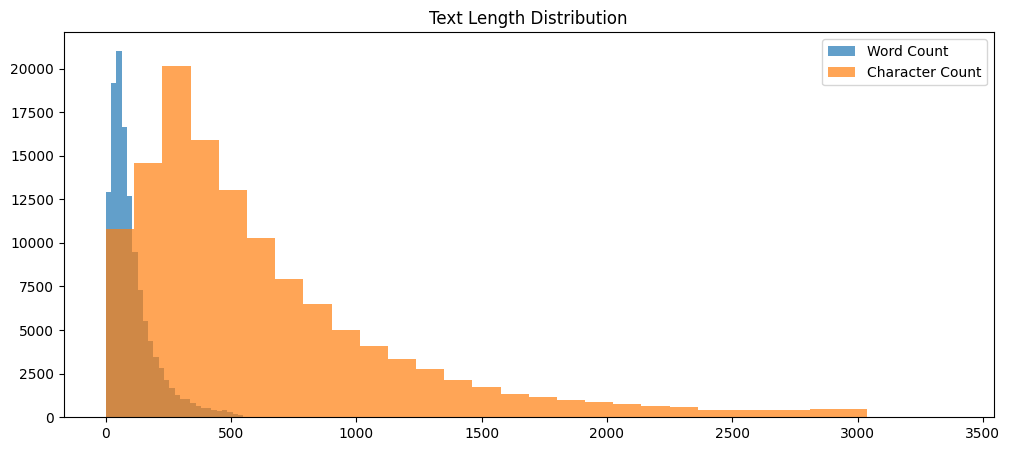

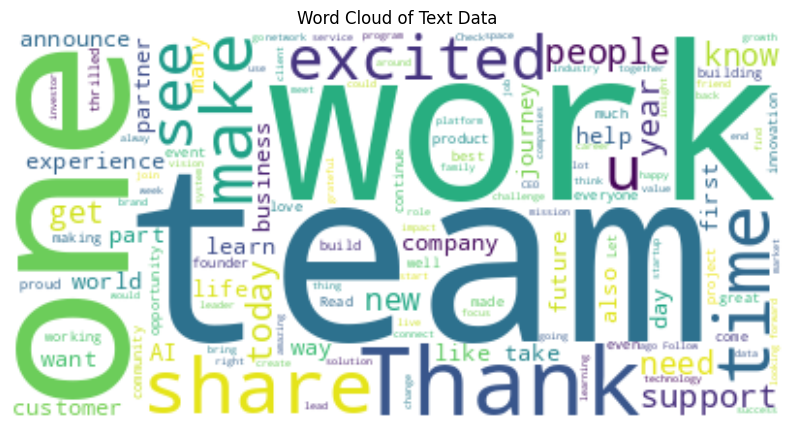

In [ ]:
# EDA: Analyze the text column
def eda_text_column(df, column_name):
    print(f"Total rows: {len(df)}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    print(f"Duplicate entries: {df[column_name].duplicated().sum()}")
    print(f"Unique entries: {df[column_name].nunique()}")

    # Text length distributions
    df['text_length'] = df[column_name].str.len()
    df['word_count'] = df[column_name].str.split().apply(len)

    # Plot length distributions
    plt.figure(figsize=(12, 5))
    plt.hist(df['word_count'].dropna(), bins=30, alpha=0.7, label='Word Count')
    plt.hist(df['text_length'].dropna(), bins=30, alpha=0.7, label='Character Count')
    plt.title('Text Length Distribution')
    plt.legend()
    plt.show()

    # Generate Word Cloud
    all_text = " ".join(df[column_name].dropna())
    wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(all_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data")
    plt.show()

eda_text_column(reactions_df, 'cleaned_reactions')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total rows: 127090
Missing values: 0
Duplicate entries: 13990
Unique entries: 113100


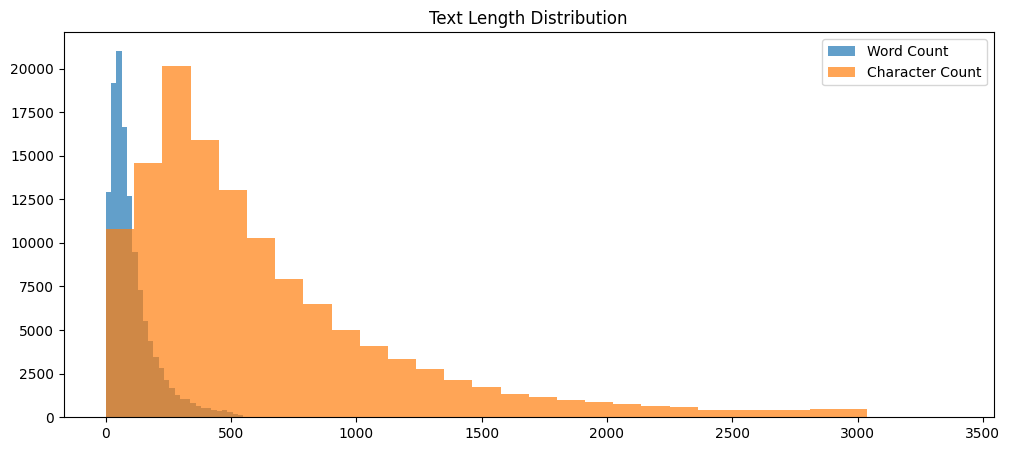

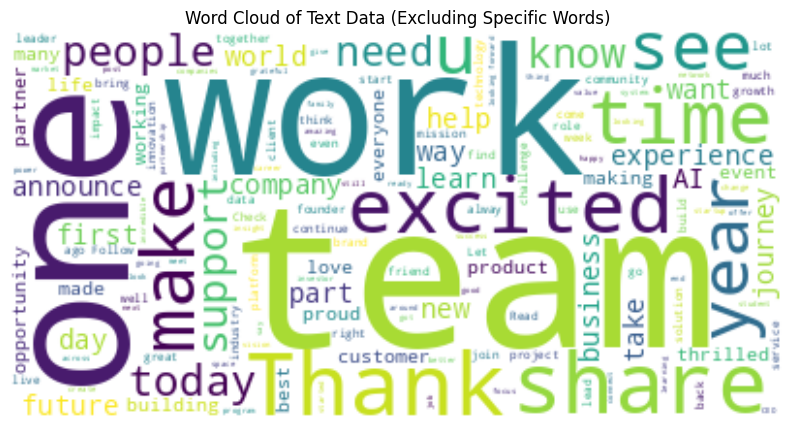

In [ ]:
# EDA: Analyze the text column
# Download stopwords if not already downloaded
nltk.download('stopwords')

def eda_text_column(df, column_name):
    print(f"Total rows: {len(df)}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    print(f"Duplicate entries: {df[column_name].duplicated().sum()}")
    print(f"Unique entries: {df[column_name].nunique()}")

    # Text length distributions
    df['text_length'] = df[column_name].str.len()
    df['word_count'] = df[column_name].str.split().apply(len)

    # Plot length distributions
    plt.figure(figsize=(12, 5))
    plt.hist(df['word_count'].dropna(), bins=30, alpha=0.7, label='Word Count')
    plt.hist(df['text_length'].dropna(), bins=30, alpha=0.7, label='Character Count')
    plt.title('Text Length Distribution')
    plt.legend()
    plt.show()

    # Generate Word Cloud
    excluded_words = {"hashtag", "comment", "like", "repost", "send", "followers"}
    custom_stopwords = set(stopwords.words('english')) | STOPWORDS | excluded_words

    # Concatenate all text for the word cloud
    all_text = " ".join(df[column_name].dropna())

    # Generate the word cloud with the additional excluded words
    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        background_color='white'
    ).generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data (Excluding Specific Words)")
    plt.show()

# Assuming `reactions_df` is your DataFrame
eda_text_column(reactions_df, 'cleaned_reactions')


2. Preprocessing for Clustering Steps:
- Tokenization and text cleaning (e.g., removing stopwords, punctuation).
- Vectorization for clustering (e.g., TF-IDF or word embeddings).

In [ ]:
def train_test_split_data(data, test_size=0.3, random_state=42):
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)

    # Verify the result
    print(f"Number of rows in training data: {len(train_data)}")
    print(f"Number of rows in test data: {len(test_data)}")

    return train_data, test_data

Preprocessing: Tokenization and Text Cleaning

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))

    # Tokenization and Cleaning
    df['cleaned_text'] = df[column_name].dropna().apply(
        lambda x: " ".join([word for word in word_tokenize(x.lower())
                            if word.isalpha() and word not in stop_words])
    )
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorization for Clustering: TF-IDF

In [ ]:
def vectorize_text(df, column_name):
    vectorizer = TfidfVectorizer(max_features=1000)  # Adjust features as needed
    X = vectorizer.fit_transform(df[column_name].dropna())
    return X, vectorizer


In [ ]:
#train_data, test_data = train_test_split_data(data, test_size=0.3, random_state=42)

In [ ]:
train_feature_data = preprocess_text(train_feature_data, 'cleaned_reactions')

In [ ]:
train_data = preprocess_text(train_data, 'cleaned_reactions')

In [ ]:
test_data = preprocess_text(test_data, 'cleaned_reactions')


In [ ]:
personality_train_data = preprocess_text(personality_train_data, 'cleaned_reactions')
personality_test_data = preprocess_text(personality_test_data, 'cleaned_reactions')
#personality_train_model_data = preprocess_text(personality_train_model_data, 'cleaned_reactions')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text
0,17116,joseph-chen-cmrp-691bb510,👏🏼 I’d like to give a big shoot out to the ent...,0,0,0,like give big shoot entire eatable team privil...
1,17116,joseph-chen-cmrp-691bb510,Incredible work by the whole team!\nLesley Haw...,0,0,0,incredible work whole team lesley hawkins lesl...
2,17116,joseph-chen-cmrp-691bb510,Canada's Children's Hospital Foundations is HI...,0,0,0,canada children hospital foundations hiring so...
3,17116,joseph-chen-cmrp-691bb510,I’m happy to share that I’m starting a new pos...,0,0,0,happy share starting new position marketing ma...
4,17116,joseph-chen-cmrp-691bb510,"As a coordinator at Sephora Gold, I’m grateful...",0,0,0,coordinator sephora gold grateful able plan br...
...,...,...,...,...,...,...,...
40225,8354,steven-wasserman-10084b63,"What an exciting day it was, to celebrate our ...",0,1,0,exciting day celebrate listing nyse december c...
40226,8354,steven-wasserman-10084b63,In the immortal words of Marv Albért… \nYES AN...,0,1,0,immortal words marv yes counts
40227,8354,steven-wasserman-10084b63,"Something has authority in your life—work, spo...",0,1,0,something authority spouse friend feelings mon...
40228,8354,steven-wasserman-10084b63,"Planning a wedding is a big deal, but so is pl...",0,1,0,planning wedding big deal planning future toge...


For the vectorization we have to train the vectorization on the train data and apply it to the test data

In [ ]:
train_feature_data = train_feature_data[train_feature_data['cleaned_text'].notna()]

In [ ]:
train_data = train_data[train_data['cleaned_text'].notna()]
X_train, vectorizer = vectorize_text(train_data, 'cleaned_text')


In [ ]:
X_test = vectorizer.transform(test_data['cleaned_text'].dropna())

In [ ]:
test_data = test_data[test_data['cleaned_text'].notna()]


In [ ]:
X_test

<37849x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1006188 stored elements in Compressed Sparse Row format>

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


3. Clustering Approaches:
- K-means with vectorized data.
- Hierarchical clustering.
- Topic modeling with Latent Dirichlet Allocation (LDA).

Split data in train and test split. Usually in supervised learing a train test split is uncommon, but in this case it is important, because we want to make sure that the clusters are applicable to previously unseen data

Step 3: Clustering with K-Means

In [ ]:
def cluster_text(X_train, X_test, n_clusters=5):
    # Step 2: Train the KMeans model on the training dataset
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)  # Train the model on the training data

    # Step 3: Predict the clusters on the test dataset
    train_clusters = kmeans.predict(X_train)  # Predict on the training data
    test_clusters = kmeans.predict(X_test)  # Predict on the test data

    # Step 4: Evaluate clustering on the test dataset using Silhouette Score
    score = silhouette_score(X_test, test_clusters)
    print(f"Silhouette Score on test data for {n_clusters} clusters: {score}")

    # Step 5: Return both the test clusters and the trained KMeans model
    return test_clusters, train_clusters, kmeans  # Ensure you return these values


Step 3.1: Visualize Clusters

In [ ]:
def visualize_clusters(X, clusters):
    # Convert sparse matrix to dense if necessary
    if hasattr(X, "toarray"):
        X = X.toarray()

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("PCA Visualization of Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.show()


Step 4: Assign Topics to Clusters

In [ ]:
def assign_topic_labels(df, clusters, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    df['reactions_cluster_Kmeans_initial_model'] = clusters

    # Get top words for each cluster
    topic_labels = {}
    for cluster in set(clusters):
        # Combine all text in the cluster
        cluster_texts = " ".join(df[df['reactions_cluster_Kmeans_initial_model'] == cluster]['cleaned_text'])
        # Count term frequencies
        cluster_vector = Counter(word_tokenize(cluster_texts))
        top_words = cluster_vector.most_common(n_top_words)
        topic_labels[cluster] = [word for word, _ in top_words]

    # Display topics
    print("Cluster Topics:")
    for cluster, words in topic_labels.items():
        print(f"Cluster {cluster}: {', '.join(words)}")

    return topic_labels


1. Perform Clusting:

Silhouette Score on test data for 5 clusters: 0.008375409521478892


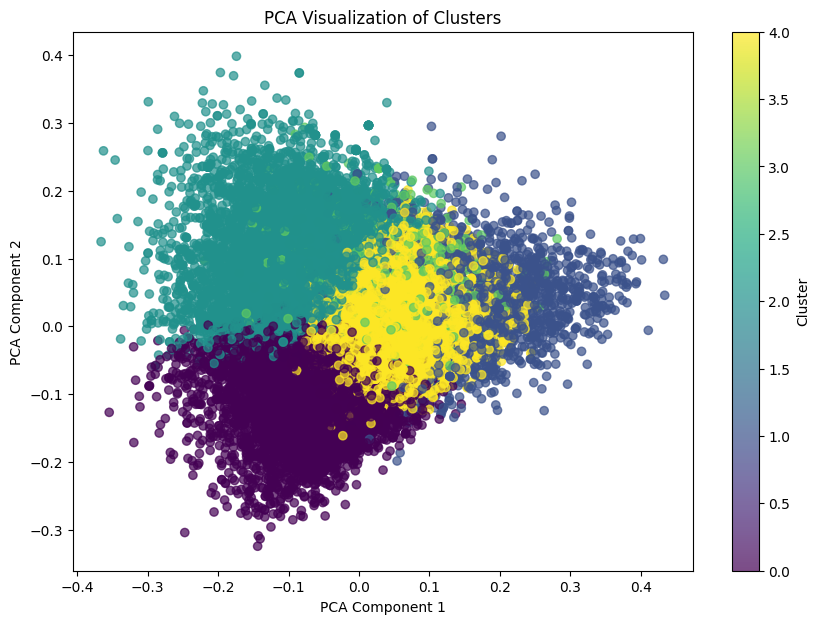

In [ ]:
test_clusters, train_clusters, kmeans_model = cluster_text(X_train, X_test, n_clusters=5)
visualize_clusters(X_test, test_clusters)


2. Assign Topics:

Comparing the labeling of the clusters for test and training data

In [ ]:
topic_labels = assign_topic_labels(test_data, test_clusters, vectorizer)

Cluster Topics:
Cluster 0: time, people, one, work, like, years, us, new, get, team
Cluster 1: ai, data, new, team, us, like, future, models, work, time
Cluster 2: team, new, excited, thank, share, work, journey, us, incredible, support
Cluster 3: followers, ago, follow, team, new, us, years, edited, months, excited
Cluster 4: new, us, data, team, one, today, learn, future, business, see


In [ ]:
topic_labels = assign_topic_labels(train_data, train_clusters, vectorizer)

Cluster Topics:
Cluster 0: time, people, one, work, like, years, us, new, get, team
Cluster 1: ai, data, new, team, us, like, future, work, time, use
Cluster 2: team, new, excited, thank, share, work, journey, us, support, forward
Cluster 3: followers, ago, follow, team, new, us, months, years, excited, edited
Cluster 4: new, us, data, today, team, one, health, business, learn, future


### Test Cluster Topic Analysis
Cluster 0: Work and Collaboration
This cluster focuses on productivity, teamwork, and experiences over time. Words like "time," "people," "work," and "team" highlight discussions about collaboration, achieving goals, or reflecting on past and ongoing efforts. The presence of "like" and "years" suggests a mix of retrospective insights and appreciation for collective contributions.

Cluster 1: AI and Data-Driven Innovation
This cluster emphasizes technology and innovation, particularly in AI and data. Keywords such as "ai," "data," "models," and "future" indicate a focus on emerging technologies and their potential impact. The inclusion of "work" and "team" suggests discussions around how teams are leveraging these technologies to build innovative solutions.

Cluster 2: Team Appreciation and Milestones
This cluster is centered on celebrating teamwork, achievements, and journeys. Words like "excited," "thank," "share," and "support" indicate an appreciation for contributions and support from team members or stakeholders. It suggests a positive and motivational tone, highlighting progress and collaboration.

Cluster 3: Social Media Engagement and Growth
This cluster relates to social media dynamics, focusing on followers, growth, and engagement. Words like "followers," "follow," "team," and "edited" suggest a focus on building a community or audience. Mentions of "years" and "months" indicate milestone reflections or tracking progress over time.

Cluster 4: Business and Future-Oriented Learning
This cluster highlights business growth, learning, and future opportunities. Words like "data," "learn," "future," and "business" suggest a focus on professional development and strategic goals. The mention of "new," "today," and "see" indicates an emphasis on staying current and exploring opportunities for growth.

Summary
Collaboration and Productivity: Cluster 0 focuses on teamwork and achieving goals over time.
Technological Innovation: Cluster 1 highlights advancements in AI, data, and modeling.
Team Milestones and Motivation: Cluster 2 celebrates progress, teamwork, and mutual support.
Social Media and Audience Growth: Cluster 3 reflects engagement, community building, and milestone tracking.
Business Growth and Learning: Cluster 4 explores professional growth, data-driven strategies, and future opportunities.

Parameters: {'max_iter': 300, 'n_clusters': 2, 'n_init': 15}, Silhouette Score: 0.004586490442253026
Parameters: {'max_iter': 300, 'n_clusters': 3, 'n_init': 15}, Silhouette Score: 0.005680338947628477
Parameters: {'max_iter': 300, 'n_clusters': 4, 'n_init': 15}, Silhouette Score: 0.007344727717284871
Parameters: {'max_iter': 300, 'n_clusters': 5, 'n_init': 15}, Silhouette Score: 0.00808118961212853
Parameters: {'max_iter': 300, 'n_clusters': 6, 'n_init': 15}, Silhouette Score: 0.00870455146264427
Parameters: {'max_iter': 300, 'n_clusters': 7, 'n_init': 15}, Silhouette Score: 0.008913914881453926
Parameters: {'max_iter': 300, 'n_clusters': 8, 'n_init': 15}, Silhouette Score: 0.009477947877671623
Parameters: {'max_iter': 300, 'n_clusters': 9, 'n_init': 15}, Silhouette Score: 0.009718223702712718
Parameters: {'max_iter': 300, 'n_clusters': 10, 'n_init': 15}, Silhouette Score: 0.01024501782643937
Parameters: {'max_iter': 300, 'n_clusters': 11, 'n_init': 15}, Silhouette Score: 0.0104123271

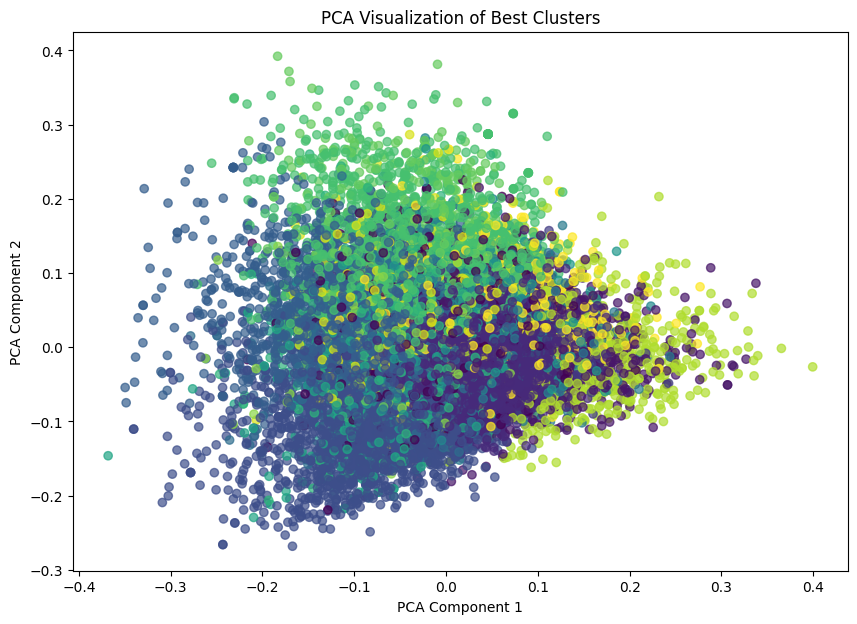

clusters on previously unseen data to prevent overfitting on the test data:
Silhouette Score for Test Clusters: 0.013303332282640818


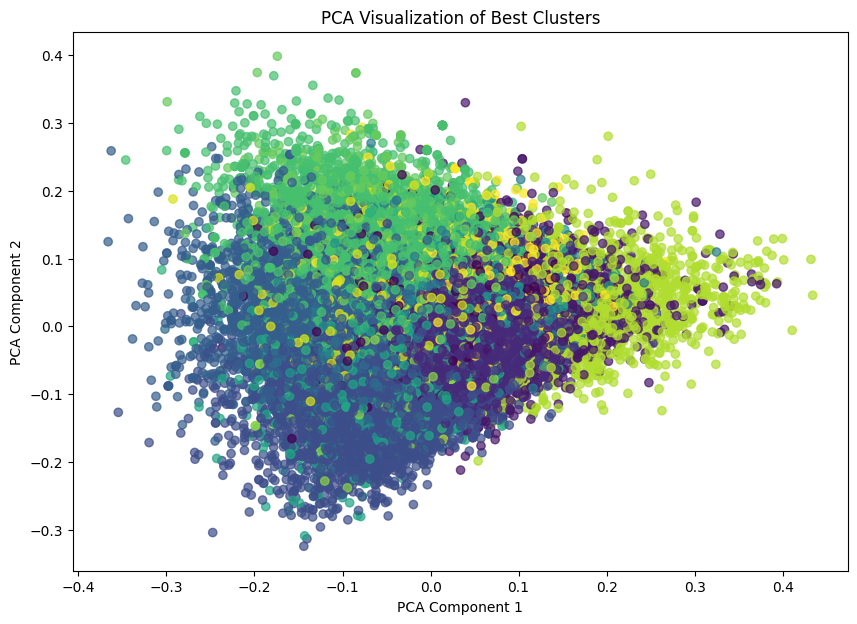

Cluster Topics:
Cluster 0: founders, capital, investors, companies, us, team, new, investment, fund, venture
Cluster 1: data, ai, new, team, insights, like, time, us, work, analytics
Cluster 2: new, us, one, today, team, learn, like, see, first, work
Cluster 3: https, new, check, team, join, us, see, today, learn, read
Cluster 4: people, time, one, work, like, years, get, new, know, make
Cluster 5: thank, team, incredible, work, us, journey, support, years, new, amazing
Cluster 6: great, team, time, new, work, thanks, thank, see, week, many
Cluster 7: security, cybersecurity, team, new, cyber, data, secure, excited, experience, cloud
Cluster 8: energy, new, future, power, team, clean, us, renewable, sustainable, technology
Cluster 9: health, care, healthcare, mental, team, new, us, work, people, support
Cluster 10: day, every, today, us, team, work, one, new, thank, time
Cluster 11: business, team, new, us, growth, one, years, time, work, like
Cluster 12: new, team, excited, looking, f

In [ ]:
# prompt: give me a code to improve the hyperparameters to reach the best possible silhuette score on the respective kvold holdouts
C_train, C_test = train_test_split(X_train, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], # Number of Clusters
    'max_iter': [300], # Maximum Iterations
    'n_init': [15]   # Number of initializations
}

best_score = -1
best_params = {}
best_kmeans_model = None

# Iterate through all combinations of parameters
for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params, random_state=42)  # Create a KMeans model with the current parameters
    kmeans.fit(C_train)

    train_clusters = kmeans.predict(C_train)
    c_test_clusters = kmeans.predict(C_test)
    score = silhouette_score(C_test, c_test_clusters)

    print(f"Parameters: {params}, Silhouette Score: {score}")

    if score > best_score:
        best_score = score
        best_params = params
        best_kmeans_model = kmeans

print(f"\nBest Parameters: {best_params}, Best Silhouette Score: {best_score}")

# Visualize best clusters
def visualize_clusters(X, clusters):
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X.toarray())
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("PCA Visualization of Best Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

visualize_clusters(C_test, best_kmeans_model.predict(C_test))


def assign_topic_labels(df, clusters, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    df['reactions_grid_optimized_k-means_cluster'] = clusters
    topic_labels = {}
    for cluster in set(clusters):
        cluster_texts = " ".join(df[df['reactions_grid_optimized_k-means_cluster'] == cluster]['cleaned_text'])
        cluster_vector = Counter(word_tokenize(cluster_texts))
        top_words = cluster_vector.most_common(n_top_words)
        topic_labels[cluster] = [word for word, _ in top_words]
    print("Cluster Topics:")
    for cluster, words in topic_labels.items():
        print(f"Cluster {cluster}: {', '.join(words)}")
    return topic_labels


# Assign topics using the best model
c_train_clusters = best_kmeans_model.predict(C_train)
c_test_clusters = best_kmeans_model.predict(C_test)
test_clusters = best_kmeans_model.predict(X_test)
train_clusters = best_kmeans_model.predict(X_train)

print("clusters on previously unseen data to prevent overfitting on the test data:")
score = silhouette_score(X_test, test_clusters)
print(f"Silhouette Score for Test Clusters: {score}")
# Visualize test clusters
visualize_clusters(X_test, test_clusters)

topic_labels = assign_topic_labels(train_data, train_clusters, vectorizer)
topic_labels = assign_topic_labels(test_data, test_clusters, vectorizer)

## Hierarchical Clustering
### Normalization
KMeans does not use a distance matrix explicitly but rather computes distances dynamically during the clustering process (e.g., using Euclidean distance). However, normalization or standardization is still important for KMeans.

Since hierarchical clustering uses distances, it's essential to normalize or standardize the data (e.g., using MinMaxScaler or StandardScaler).

Unfortunately we can not use hierarchical clustering on this probelm, because it does not allow us to cluster previously unseen data. The goal of our models final model is, that we can also apply it to new data. Features created by hierarchical clustering don't allow this because hierarchical clustering requires a linkage matrix.


Additional Notes
Clustering Methods: Common linkage methods include:

ward: Minimizes the variance within clusters.
single: Uses the minimum distance between points.
complete: Uses the maximum distance between points.
average: Uses the average distance between points.
Choose the method based on the structure of your data.

When to Use Distance Threshold:

If you want to dynamically determine clusters based on a similarity threshold, use distance_threshold.
Let me know if you'd like to execute or modify any of these steps!


Topic modeling with Latent Dirichlet Allocation (LDA).

TF-IDF vectorizer work best if the tokens are joined together to one string. This is not true for LDA. Here it is better to keep the different tokens in a list.

Preprocessing: Tokenization and Text Cleaning as a list of tokens

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))

    # Tokenization and Cleaning
    df['tokens'] = df[column_name].dropna().apply(
        lambda x: [word for word in word_tokenize(x.lower())
                   if word.isalpha() and word not in stop_words]
    )
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data = preprocess_text(train_data, 'cleaned_reactions')

In [ ]:
test_data = preprocess_text(test_data, 'cleaned_reactions')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,reactions_cluster_Kmeans_initial_model,reactions_grid_optimized_k-means_cluster,tokens
0,17116,joseph-chen-cmrp-691bb510,👏🏼 I’d like to give a big shoot out to the ent...,0,0,0,like give big shoot entire eatable team privil...,0,10,"[like, give, big, shoot, entire, eatable, team..."
1,17116,joseph-chen-cmrp-691bb510,Incredible work by the whole team!\nLesley Haw...,0,0,0,incredible work whole team lesley hawkins lesl...,2,5,"[incredible, work, whole, team, lesley, hawkin..."
2,17116,joseph-chen-cmrp-691bb510,Canada's Children's Hospital Foundations is HI...,0,0,0,canada children hospital foundations hiring so...,4,2,"[canada, children, hospital, foundations, hiri..."
3,17116,joseph-chen-cmrp-691bb510,I’m happy to share that I’m starting a new pos...,0,0,0,happy share starting new position marketing ma...,2,13,"[happy, share, starting, new, position, market..."
4,17116,joseph-chen-cmrp-691bb510,"As a coordinator at Sephora Gold, I’m grateful...",0,0,0,coordinator sephora gold grateful able plan br...,2,5,"[coordinator, sephora, gold, grateful, able, p..."
...,...,...,...,...,...,...,...,...,...,...
40225,8354,steven-wasserman-10084b63,"What an exciting day it was, to celebrate our ...",0,1,0,exciting day celebrate listing nyse december c...,4,10,"[exciting, day, celebrate, listing, nyse, dece..."
40226,8354,steven-wasserman-10084b63,In the immortal words of Marv Albért… \nYES AN...,0,1,0,immortal words marv yes counts,4,2,"[immortal, words, marv, yes, counts]"
40227,8354,steven-wasserman-10084b63,"Something has authority in your life—work, spo...",0,1,0,something authority spouse friend feelings mon...,4,2,"[something, authority, spouse, friend, feeling..."
40228,8354,steven-wasserman-10084b63,"Planning a wedding is a big deal, but so is pl...",0,1,0,planning wedding big deal planning future toge...,4,2,"[planning, wedding, big, deal, planning, futur..."


Vectorization for Clustering: TfidfVectorizer

In [ ]:
# Assuming train_data and test_data are your dataframes
# And 'tokens' is the column containing the list of tokens in each row

# Step 1: Create a Dictionary from the train data (only use train data for dictionary creation)
train_tokens = train_data['tokens'].tolist()
dictionary = corpora.Dictionary(train_tokens)  # Use train data only for the dictionary

# Step 2: Create a Bag-of-Words (BoW) representation of the training documents
train_corpus = [dictionary.doc2bow(tokens) for tokens in train_tokens]

# Step 3: Apply LDA to the training corpus (train data only)
lda_model = gensim.models.LdaMulticore(train_corpus, num_topics=5, id2word=dictionary, passes=10)

# Step 4: Print the topics discovered by LDA
print("Topics discovered by LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic #{idx}: {topic}")

# Step 5: Vectorize the test data using the same dictionary
test_tokens = test_data['tokens'].tolist()
test_corpus = [dictionary.doc2bow(tokens) for tokens in test_tokens]

# Step 6: Get the topic distribution for each document in the test corpus
test_topic_distribution = [lda_model.get_document_topics(doc) for doc in test_corpus]

# Optionally, you can assign the most likely topic to each document
test_data['reactions_LDA_assigned_topic'] = [max(dist, key=lambda x: x[1])[0] for dist in test_topic_distribution]

# Step 7: Output the topics for the test data
print("\nTest Data with Assigned Topics:")
print(test_data[['tokens', 'reactions_LDA_assigned_topic']].head())

# Step 8: Get the topic distribution for each document in the train corpus
train_topic_distribution = [lda_model.get_document_topics(doc) for doc in train_corpus]

# Step 9: Assign the most likely topic to each document in the train data
train_data['reactions_LDA_assigned_topic'] = [max(dist, key=lambda x: x[1])[0] for dist in train_topic_distribution]

# Step 10: Output the topics for the train data
print("\nTrain Data with Assigned Topics:")
print(train_data[['tokens', 'reactions_LDA_assigned_topic']].head())

Topics discovered by LDA:
Topic #0: 0.012*"ai" + 0.008*"data" + 0.006*"new" + 0.005*"product" + 0.004*"health" + 0.004*"team" + 0.003*"platform" + 0.003*"us" + 0.003*"business" + 0.003*"technology"
Topic #1: 0.005*"like" + 0.004*"use" + 0.004*"data" + 0.004*"get" + 0.003*"one" + 0.003*"work" + 0.003*"time" + 0.003*"new" + 0.003*"using" + 0.003*"security"
Topic #2: 0.011*"team" + 0.007*"people" + 0.007*"years" + 0.007*"work" + 0.006*"many" + 0.006*"thank" + 0.006*"new" + 0.005*"great" + 0.005*"journey" + 0.005*"us"
Topic #3: 0.010*"team" + 0.009*"new" + 0.007*"excited" + 0.007*"thank" + 0.006*"us" + 0.005*"share" + 0.005*"support" + 0.004*"work" + 0.004*"forward" + 0.004*"thrilled"
Topic #4: 0.007*"time" + 0.007*"one" + 0.006*"people" + 0.005*"like" + 0.005*"work" + 0.005*"day" + 0.005*"years" + 0.004*"year" + 0.004*"us" + 0.004*"get"

Test Data with Assigned Topics:
                                              tokens  \
0  [like, give, big, shoot, entire, eatable, team...   
1  [incre

### Topic Analysis
Topic #0: AI, Data, and Technological Innovation
This topic revolves around advancements in AI, data, and technology. Keywords like "ai," "data," "product," and "technology" indicate a focus on innovation and its applications in business and health. Mentions of "platform" and "team" suggest collaborative efforts to develop new technological solutions, particularly in product development and health-related fields.

Topic #1: Practical Use of Data and Security
This topic emphasizes the practical applications of data and technology. Words like "use," "get," "using," and "security" highlight discussions on leveraging data for specific purposes while ensuring safety and efficiency. The presence of "time" and "work" suggests a focus on improving workflows or processes using data-driven approaches.

Topic #2: Teamwork and Professional Growth
This topic celebrates teamwork and professional journeys. Words like "team," "people," "years," and "work" indicate a focus on collaboration, achievements over time, and gratitude. Mentions of "many," "thank," and "journey" reflect a positive tone, appreciating the contributions of individuals and teams to shared goals.

Topic #3: Excitement and Collaboration
This topic highlights excitement and forward-thinking collaboration. Keywords such as "excited," "thank," "share," and "support" suggest a focus on sharing achievements, fostering team spirit, and expressing enthusiasm for future endeavors. The inclusion of "thrilled" and "forward" indicates optimism and a focus on progress.

Topic #4: Personal and Professional Reflection
This topic centers on reflection and daily life experiences. Words like "time," "people," "day," and "years" suggest a mix of professional and personal contexts. Mentions of "work" and "get" highlight day-to-day activities, while "year" and "years" imply reflections on past achievements and experiences.

Summary
Innovation and Technology: Topic #0 emphasizes AI, data, and technological advancements.
Practical Applications: Topic #1 discusses data usage, workflows, and security considerations.
Teamwork and Growth: Topic #2 celebrates collaboration, professional achievements, and gratitude.
Excitement and Optimism: Topic #3 highlights enthusiasm, support, and future-focused teamwork.
Reflection and Experiences: Topic #4 reflects on time, people, and day-to-day professional and personal experiences.

In [ ]:
test_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,reactions_cluster_Kmeans_initial_model,reactions_grid_optimized_k-means_cluster,tokens,reactions_LDA_assigned_topic
0,17116,joseph-chen-cmrp-691bb510,👏🏼 I’d like to give a big shoot out to the ent...,0,0,0,like give big shoot entire eatable team privil...,0,10,"[like, give, big, shoot, entire, eatable, team...",4
1,17116,joseph-chen-cmrp-691bb510,Incredible work by the whole team!\nLesley Haw...,0,0,0,incredible work whole team lesley hawkins lesl...,2,5,"[incredible, work, whole, team, lesley, hawkin...",3
2,17116,joseph-chen-cmrp-691bb510,Canada's Children's Hospital Foundations is HI...,0,0,0,canada children hospital foundations hiring so...,4,2,"[canada, children, hospital, foundations, hiri...",3
3,17116,joseph-chen-cmrp-691bb510,I’m happy to share that I’m starting a new pos...,0,0,0,happy share starting new position marketing ma...,2,13,"[happy, share, starting, new, position, market...",3
4,17116,joseph-chen-cmrp-691bb510,"As a coordinator at Sephora Gold, I’m grateful...",0,0,0,coordinator sephora gold grateful able plan br...,2,5,"[coordinator, sephora, gold, grateful, able, p...",3
...,...,...,...,...,...,...,...,...,...,...,...
40225,8354,steven-wasserman-10084b63,"What an exciting day it was, to celebrate our ...",0,1,0,exciting day celebrate listing nyse december c...,4,10,"[exciting, day, celebrate, listing, nyse, dece...",3
40226,8354,steven-wasserman-10084b63,In the immortal words of Marv Albért… \nYES AN...,0,1,0,immortal words marv yes counts,4,2,"[immortal, words, marv, yes, counts]",4
40227,8354,steven-wasserman-10084b63,"Something has authority in your life—work, spo...",0,1,0,something authority spouse friend feelings mon...,4,2,"[something, authority, spouse, friend, feeling...",4
40228,8354,steven-wasserman-10084b63,"Planning a wedding is a big deal, but so is pl...",0,1,0,planning wedding big deal planning future toge...,4,2,"[planning, wedding, big, deal, planning, futur...",0


In [ ]:
test_data.columns

Index(['Unnamed: 0', 'username', 'cleaned_reactions', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'reactions_cluster_Kmeans_initial_model',
       'reactions_grid_optimized_k-means_cluster', 'tokens',
       'reactions_LDA_assigned_topic'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Silhouette Score for Test Data: 0.011491315439343452
Train Data with Clusters:
                                       cleaned_text1  \
0  you have generally two paths the more you lear...   
1  were thrilled to present the swimlane anchor a...   
2  we need more cybersecurity startups wiling to ...   
3  hey everyone the threat detection team at appo...   
4  yesterday my tenure at cofense ended unexpecte...   

   reactions_cluster_Bert_Kmeans  
0                              4  
1                              3  
2                              1  
3                              1  
4                              2  
Test Data with Predicted Clusters:
                                       cleaned_text1  \
0   id like to give a big shoot out to the entire...   
1  incredible work by the whole team\nlesley hawk...   
2  canadas childrens hospital foundations is hiri...   
3  im happy to share that im starting a new posit...   
4  as a coordinator at sephora gold im grateful t...   

  

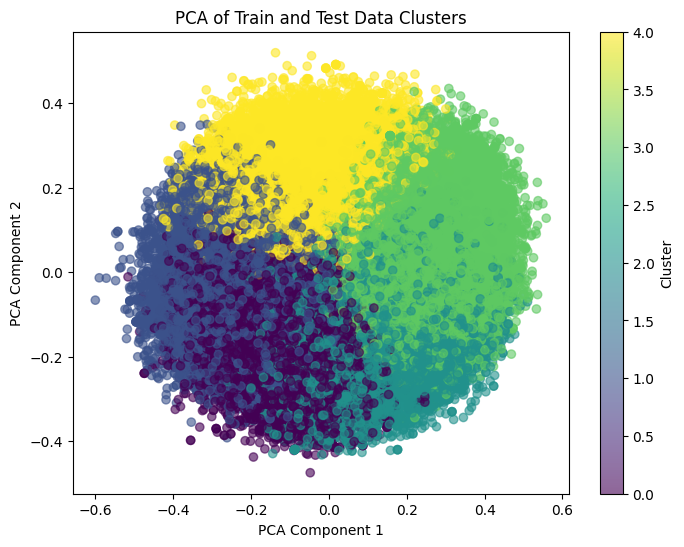

In [ ]:
# Function to clean and preprocess the text data (optional)
def preprocess_text(text):
    # Basic text preprocessing (optional)
    text = text.lower()
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    return text

# Step 1: Preprocess the train and test data
train_data['cleaned_text1'] = train_data['cleaned_reactions'].apply(preprocess_text)
test_data['cleaned_text1'] = test_data['cleaned_reactions'].apply(preprocess_text)
train_feature_data['cleaned_text1'] = train_feature_data['cleaned_reactions'].apply(preprocess_text)
personality_train_data['cleaned_text1'] = personality_train_data['cleaned_reactions'].apply(preprocess_text)
personality_test_data['cleaned_text1'] = personality_test_data['cleaned_reactions'].apply(preprocess_text)
#personality_train_model_data['cleaned_text1'] = personality_train_model_data['cleaned_reactions'].apply(preprocess_text)

# Step 2: Load a pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight model for embeddings

# Step 3: Generate embeddings for train and test data
train_embeddings = model.encode(train_data['cleaned_text1'].tolist(), convert_to_numpy=True)
test_embeddings = model.encode(test_data['cleaned_text1'].tolist(), convert_to_numpy=True)
train_feature_embeddings = model.encode(train_feature_data['cleaned_text1'].tolist(), convert_to_numpy=True)
personality_train_embeddings = model.encode(personality_train_data['cleaned_text1'].tolist(), convert_to_numpy=True)
personality_test_embeddings = model.encode(personality_test_data['cleaned_text1'].tolist(), convert_to_numpy=True)
#personality_train_model_embeddings = model.encode(personality_train_model_data['cleaned_text1'].tolist(), convert_to_numpy=True)


# Step 4: Apply K-Means clustering on train data
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_data['reactions_cluster_Bert_Kmeans'] = kmeans.fit_predict(train_embeddings)

# Step 5: Predict the clusters for test data
test_data['reactions_cluster_Bert_Kmeans'] = kmeans.predict(test_embeddings)

# Step 6: Compute Silhouette score for test data
sil_score = silhouette_score(test_embeddings, test_data['reactions_cluster_Bert_Kmeans'])
print(f"Silhouette Score for Test Data: {sil_score}")

# Step 7: Output the clustered data
print("Train Data with Clusters:")
print(train_data[['cleaned_text1', 'reactions_cluster_Bert_Kmeans']].head())

print("Test Data with Predicted Clusters:")
print(test_data[['cleaned_text1', 'reactions_cluster_Bert_Kmeans']].head())

# Optionally, save the output to CSV files
train_data[['cleaned_text1', 'reactions_cluster_Bert_Kmeans']].to_csv('clustered_train_data.csv', index=False)
test_data[['cleaned_text1', 'reactions_cluster_Bert_Kmeans']].to_csv('clustered_test_data.csv', index=False)

# Step 8: PCA Visualization of the clusters
# Combine train and test embeddings for PCA visualization
combined_embeddings = np.concatenate([train_embeddings, test_embeddings])
combined_labels = np.concatenate([train_data['reactions_cluster_Bert_Kmeans'], test_data['reactions_cluster_Bert_Kmeans']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
combined_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
combined_df['Cluster'] = combined_labels

# Plot the PCA components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['PCA1'], combined_df['PCA2'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA of Train and Test Data Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


n_clusters: 2, init: k-means++, max_iter: 100, Silhouette Score: 0.026749951764941216
n_clusters: 2, init: k-means++, max_iter: 200, Silhouette Score: 0.026749951764941216
n_clusters: 2, init: k-means++, max_iter: 300, Silhouette Score: 0.026749951764941216
n_clusters: 2, init: random, max_iter: 100, Silhouette Score: 0.02673826739192009
n_clusters: 2, init: random, max_iter: 200, Silhouette Score: 0.02673826739192009
n_clusters: 2, init: random, max_iter: 300, Silhouette Score: 0.02673826739192009
n_clusters: 3, init: k-means++, max_iter: 100, Silhouette Score: 0.014150656759738922
n_clusters: 3, init: k-means++, max_iter: 200, Silhouette Score: 0.014150656759738922
n_clusters: 3, init: k-means++, max_iter: 300, Silhouette Score: 0.014150656759738922
n_clusters: 3, init: random, max_iter: 100, Silhouette Score: 0.014194195158779621
n_clusters: 3, init: random, max_iter: 200, Silhouette Score: 0.014194195158779621
n_clusters: 3, init: random, max_iter: 300, Silhouette Score: 0.01419419

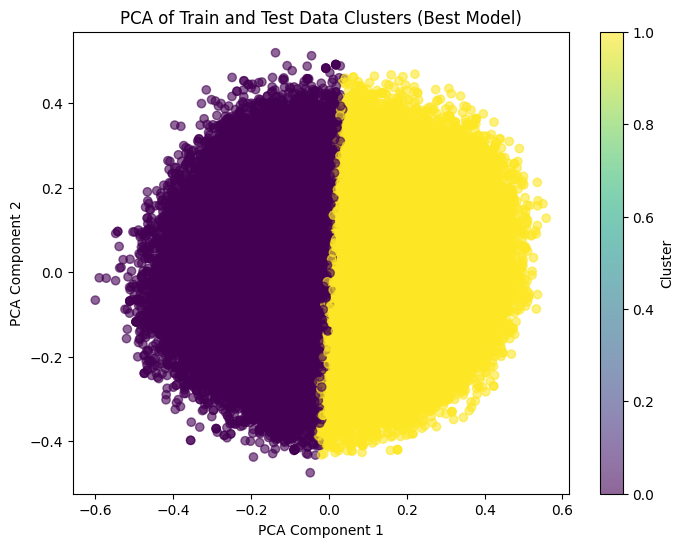

In [ ]:
C_train_embeddings, C_test_embeddings = train_test_split(train_embeddings, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the search space for hyperparameters
n_clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Range of number of clusters to try
init_methods = ['k-means++', 'random']  # Different initialization methods for centroids
max_iter_range = [100, 200, 300]  # Different number of iterations for KMeans

# Function to evaluate silhouette score for a set of hyperparameters
def evaluate_kmeans(n_clusters, init, max_iter, C_train_embeddings, C_test_embeddings):
    kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42)
    kmeans.fit(C_train_embeddings)  # Train on the train set
    C_test_clusters = kmeans.predict(C_test_embeddings)  # Predict on the test set

    # Calculate the silhouette score
    sil_score = silhouette_score(C_test_embeddings, C_test_clusters)
    return sil_score, kmeans  # Return both score and the trained model

# Search through the hyperparameter combinations
best_score = -1
best_params = None
best_kmeans = None

for n_clusters in n_clusters_range:
    for init in init_methods:
        for max_iter in max_iter_range:
            # Evaluate for the current hyperparameters
            sil_score, kmeans = evaluate_kmeans(n_clusters, init, max_iter, C_train_embeddings, C_test_embeddings)
            print(f"n_clusters: {n_clusters}, init: {init}, max_iter: {max_iter}, Silhouette Score: {sil_score}")

            # If the current score is better than the best score, update the best parameters
            if sil_score > best_score:
                best_score = sil_score
                best_params = (n_clusters, init, max_iter)
                best_kmeans = kmeans

# Output the best hyperparameters and the corresponding silhouette score
print("\nBest Hyperparameters found:")
print(f"n_clusters: {best_params[0]}, init: {best_params[1]}, max_iter: {best_params[2]}")
print(f"Best Silhouette Score: {best_score}")

# Step 1: Assign the best cluster labels to the train and test data
train_data['reactions_K-means_Bert_cluster'] = best_kmeans.predict(train_embeddings)
test_data['reactions_K-means_Bert_cluster'] = best_kmeans.predict(test_embeddings)

print("clusters on previously unseen data, even in the hyper parameter optimization process to prevent overfitting on the test data:")
score = silhouette_score(test_embeddings, test_data['reactions_K-means_Bert_cluster'])
print(f"Silhouette Score for Test Clusters: {score}")
# Step 2: PCA Visualization of the clusters
# Combine train and test embeddings for PCA visualization
combined_embeddings = np.concatenate([train_embeddings, test_embeddings])
combined_labels = np.concatenate([train_data['reactions_K-means_Bert_cluster'], test_data['reactions_K-means_Bert_cluster']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
combined_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
combined_df['Cluster'] = combined_labels

# Plot the PCA components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['PCA1'], combined_df['PCA2'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA of Train and Test Data Clusters (Best Model)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



BERTopic: can cluster end extract topics out of BERT embedded texts

In [ ]:
test_embeddings

array([[-0.04863597,  0.02067626,  0.0534044 , ..., -0.01360941,
        -0.0431713 ,  0.01598605],
       [-0.00824684,  0.04570704, -0.0559671 , ..., -0.0772169 ,
        -0.03879806,  0.01818476],
       [-0.01234365, -0.06935716,  0.05149382, ..., -0.08024034,
         0.07189586,  0.07486756],
       ...,
       [-0.04519555,  0.07760779, -0.03077107, ..., -0.00707684,
         0.00078296, -0.06576476],
       [ 0.00088135,  0.04385393,  0.04515997, ..., -0.01719814,
        -0.03110366,  0.02302659],
       [-0.03126065, -0.02586917, -0.00018436, ..., -0.08370252,
        -0.04406522,  0.01059979]], dtype=float32)

In [ ]:
# Step 1: Initialize BERTopic
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,  # Optional: Calculate probabilities for topic assignments
)

# Step 2: Fit the model using precomputed embeddings and corresponding text
topics, probabilities = topic_model.fit_transform(train_data['cleaned_text1'].tolist(), embeddings=train_embeddings)

# Step 3: Reduce the number of topics to a maximum of 20
# Pass the original documents (train_data['cleaned_text1'].tolist()) to reduce_topics
topic_model.reduce_topics(train_data['cleaned_text1'].tolist(), nr_topics=20)

# Step 4: Add the reduced topic labels to the training data
train_data['reactions_K-means_Bertopic_topic'] = topic_model.get_document_info(train_data['cleaned_text1'])['Topic']

# Step 5: Apply the model to the test data
test_topics, _ = topic_model.transform(test_data['cleaned_text1'].tolist(), embeddings=test_embeddings)
test_data['reactions_K-means_Bertopic_topic'] = test_topics

# Step 6: Explore the reduced topics
for topic in range(20):  # Assuming a maximum of 20 topics
    print(f"Topic {topic}: {topic_model.get_topic(topic)}")

# Step 7: Visualize the reduced topics
topic_model.visualize_topics()


Topic 0: [('the', 0.03278242116203572), ('to', 0.03125970877276994), ('and', 0.030800534318455208), ('of', 0.025797854300231342), ('in', 0.023205565971684595), ('for', 0.021158056116401366), ('with', 0.017711443818587625), ('is', 0.017299886264547287), ('our', 0.016705477699427658), ('this', 0.016504514714582287)]
Topic 1: [('bug', 0.049941362748111076), ('bounty', 0.04755347044193224), ('ssrf', 0.03223085004909648), ('the', 0.03208172413479404), ('security', 0.03047531256181221), ('vulnerability', 0.02958212809388665), ('hackerone', 0.029304594065657368), ('to', 0.028332298880450527), ('internal', 0.024193343600973995), ('and', 0.02317142672841299)]
Topic 2: [('my', 0.033094081033973925), ('and', 0.031829954128785275), ('to', 0.030813918274208766), ('was', 0.029220190902041875), ('the', 0.028048217869511165), ('he', 0.02781441149737558), ('of', 0.026807018418370163), ('me', 0.022484850551378503), ('his', 0.021662217340398172), ('her', 0.021433480955134813)]
Topic 3: [('the', 0.0428672

In [ ]:
# Step 1: Define a function to generate a label for each topic
def generate_topic_label(topic_num, top_n_words=5):
    # Get the top n words of the topic
    top_words = topic_model.get_topic(topic_num)

    # If the topic doesn't exist or has no words (i.e., it returns False), return a default label
    if not top_words:  # False, None, or empty list are handled here
        return f"Topic {topic_num} (No words)"

    # Extract the words from the list of tuples
    words = [word for word, _ in top_words[:top_n_words]]

    # Create a label by joining the top words
    label = " ".join(words)

    return label

# Step 2: Generate labels for all topics
topic_labels = {}
for topic_num in range(20):  # Assuming you have 20 topics
    topic_labels[topic_num] = generate_topic_label(topic_num)

# Step 3: Add the labels to the training data
train_data['reactions_K-means_Bertopic_topic_label'] = train_data['reactions_K-means_Bertopic_topic'].map(topic_labels)

# Step 4: Add the labels to the test data
test_data['reactions_K-means_Bertopic_topic_label'] = test_data['reactions_K-means_Bertopic_topic'].map(topic_labels)

# Step 5: Print the topic labels for verification
for topic_num, label in topic_labels.items():
    print(f"Topic {topic_num}: {label}")


Topic 0: the to and of in
Topic 1: bug bounty ssrf the security
Topic 2: my and to was the
Topic 3: the of in and israel
Topic 4: were wrap at the wrapmate
Topic 5: the vote election and to
Topic 6: the job you candidate to
Topic 7: maps data and the of
Topic 8: birds bird pic you of
Topic 9: language translation you english spanish
Topic 10: formulations silk ingredient and products
Topic 11: laundry hampr hoodie sleeve that
Topic 12: steam trap pulse failures traps
Topic 13: lithiumsulfur batteries lytens lyten battery
Topic 14: pink hackerone bold colorits kind
Topic 15: computers generation his young bios
Topic 16: door nabco doors sliding automatic
Topic 17: artax autoimmune ax158 vandeusen biopharma
Topic 18: probabilities table doesnt yankees dogders
Topic 19: Topic 19 (No words)


### Topic Analysis
Topic 0: General or Stopwords
Keywords: the, to, and, of, in
Interpretation: This topic primarily consists of stopwords with no significant thematic focus. It may indicate a preprocessing issue or serve as a baseline grouping.
Topic 1: Bug Bounty and Cybersecurity
Keywords: bug, bounty, ssrf, the, security
Interpretation: Focused on cybersecurity topics, particularly related to bug bounty programs and vulnerabilities like SSRF (Server-Side Request Forgery). Likely reflects content about ethical hacking and vulnerability disclosure.
Topic 2: Personal Narratives
Keywords: my, and, to, was, the
Interpretation: This topic suggests personal storytelling or narratives, likely involving reflections or experiences. The generality of the keywords indicates diverse personal content.
Topic 3: Israel and Geopolitics
Keywords: the, of, in, and, israel
Interpretation: Geopolitical discussions centered on Israel. This could include topics about history, politics, or current events related to the region.
Topic 4: Advertising and Branding
Keywords: were, wrap, at, the, wrapmate
Interpretation: Likely related to advertising, branding, or promotional content. "Wrapmate" suggests a specific platform or campaign tied to branding strategies.
Topic 5: Elections and Voting
Keywords: the, vote, election, and, to
Interpretation: Focused on political processes such as voting and elections. Likely includes discussions on campaigns, civic engagement, or election outcomes.
Topic 6: Recruitment and Jobs
Keywords: the, job, you, candidate, to
Interpretation: Related to recruitment, hiring processes, or job-seeking advice. Keywords indicate a focus on candidates and employment opportunities.
Topic 7: Maps and Geographic Data
Keywords: maps, data, and, the, of
Interpretation: Centered on geographic information systems (GIS) or mapping. Likely includes discussions about spatial data and related technologies.
Topic 8: Birds and Nature Photography
Keywords: birds, bird, pic, you, of
Interpretation: Reflects content about birds, likely involving nature photography or birdwatching. The inclusion of "pic" suggests a visual element.
Topic 9: Language Translation
Keywords: language, translation, you, english, spanish
Interpretation: Focused on language translation, particularly between English and Spanish. Could include discussions about tools, techniques, or linguistic nuances.
Topic 10: Skincare and Ingredients
Keywords: formulations, silk, ingredient, and, products
Interpretation: Related to skincare or cosmetic products. Highlights formulations, ingredients, and specific materials like silk.
Topic 11: Laundry and Apparel
Keywords: laundry, hampr, hoodie, sleeve, that
Interpretation: Centered on laundry services or apparel. Mentions of "hoodie" and "sleeve" suggest a focus on clothing.
Topic 12: Steam Systems and Failures
Keywords: steam, trap, pulse, failures, traps
Interpretation: A technical topic focused on steam systems, likely related to engineering or industrial processes.
Topic 13: Lithium-Sulfur Batteries
Keywords: lithiumsulfur, batteries, lytens, lyten, battery
Interpretation: Focused on advanced battery technologies, particularly lithium-sulfur batteries. Highlights specific innovations and companies in this sector.
Topic 14: Hackerone and Design
Keywords: pink, hackerone, bold, colorits, kind
Interpretation: Combines cybersecurity (HackerOne) with design elements like colors. May reflect creative or promotional content with a security theme.
Topic 15: Generational Technology
Keywords: computers, generation, his, young, bios
Interpretation: Reflects discussions about generational technology, possibly contrasting the use of computers by different age groups.
Topic 16: Automatic Doors
Keywords: door, nabco, doors, sliding, automatic
Interpretation: Focused on automatic door systems, likely related to technologies or products from companies like Nabco.
Topic 17: Biopharma and Autoimmune Research
Keywords: artax, autoimmune, ax158, vandeusen, biopharma
Interpretation: Highlights research and development in biopharmaceuticals, particularly related to autoimmune diseases.
Topic 18: Sports Probabilities
Keywords: probabilities, table, doesnt, yankees, dodgers
Interpretation: Related to sports analytics, focusing on probabilities or statistics involving teams like the Yankees and Dodgers.
Topic 19: Undefined
Keywords: (No words)
Interpretation: This topic lacks meaningful content and may indicate preprocessing errors or noise in the data.
Summary
Technical and Industry-Specific Topics: Topics 1 (cybersecurity), 7 (mapping), 12 (steam systems), and 13 (batteries) cover niche industries and technologies.
Personal and General Topics: Topics 2 (narratives) and 4 (branding) reflect broader, less technical themes.
Social and Geopolitical Topics: Topics 3 (Israel) and 5 (elections) touch on societal and political issues.
Consumer-Oriented Topics: Topics 6 (jobs), 8 (birds), 10 (skincare), and 11 (laundry) focus on services or hobbies.
Specialized Domains: Topics 14 (design), 16 (doors), and 17 (biopharma) highlight specific sectors.

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


# Sentimental Analysis

Recommendation for Your Use Case (Short Texts/Tweets):
- For quick, rule-based emotion analysis, VADER is a great starting point. It is lightweight, fast, and works well for informal text like tweets.
- For more nuanced emotion classification, consider using a pretrained BERT model for emotion classification (like the j-hartmann/emotion-english-distilroberta-base model on Hugging Face).
- If you want to have more granular emotion detection (beyond just positive or negative sentiment), a pretrained BERT model like GoEmotions is your best bet for classifying tweets into multiple emotions like joy, anger, sadness, etc.


Vader works with raw text, that does not require stop word removal. VADER relies on a lexicon of pre-defined words that are associated with sentiment scores (positive, negative, neutral).
Even stop words like "the," "is," and "in" can be important for VADER's calculations because they affect the tone of the sentence and the context.
For example, the phrase "This is not good" is important in determining sentiment, and removing "is" would leave "This not good," which would change the meaning.

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Download the VADER lexicon (required for sentiment analysis)
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis on text and return sentiment as a dictionary
def get_vader_sentiment(text):
    sentiment = sia.polarity_scores(text)  # Get the sentiment scores
    return sentiment  # Return the full dictionary of sentiment scores

# Apply VADER sentiment analysis row by row for train_data and split the results into four columns
train_data[['reactions_vader_sentiment_neg', 'reactions_vader_sentiment_neu',
            'reactions_vader_sentiment_pos', 'reactions_vader_sentiment_compound']] = \
    train_data['cleaned_reactions'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

# Apply VADER sentiment analysis row by row for test_data and split the results into four columns
test_data[['reactions_vader_sentiment_neg', 'reactions_vader_sentiment_neu',
           'reactions_vader_sentiment_pos', 'reactions_vader_sentiment_compound']] = \
    test_data['cleaned_reactions'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
train_data1 = train_data
test_data1 = test_data

In [ ]:
train_data = train_data1
test_data = test_data1

In [ ]:
train_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,reactions_cluster_Kmeans_initial_model,reactions_grid_optimized_k-means_cluster,tokens,reactions_LDA_assigned_topic,cleaned_text1,reactions_cluster_Bert_Kmeans,reactions_K-means_Bert_cluster,reactions_K-means_Bertopic_topic,reactions_K-means_Bertopic_topic_label,reactions_vader_sentiment_neg,reactions_vader_sentiment_neu,reactions_vader_sentiment_pos,reactions_vader_sentiment_compound
0,6356,josh-rickard,You have (generally) two paths. The more you l...,0,0,0,generally two paths learn get frustrated know ...,0,4,"[generally, two, paths, learn, get, frustrated...",4,you have generally two paths the more you lear...,4,1,-1.0,NaN,0.069,0.795,0.136,0.3673
1,6356,josh-rickard,We're thrilled to present the Swimlane Anchor ...,0,0,0,thrilled present swimlane anchor award justin ...,2,5,"[thrilled, present, swimlane, anchor, award, j...",3,were thrilled to present the swimlane anchor a...,3,1,-1.0,NaN,0.000,0.627,0.373,0.9823
2,6356,josh-rickard,We need more cybersecurity startups wiling to ...,0,0,0,need cybersecurity startups wiling go real pro...,4,2,"[need, cybersecurity, startups, wiling, go, re...",0,we need more cybersecurity startups wiling to ...,1,0,-1.0,NaN,0.083,0.864,0.053,-0.2714
3,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0,hey everyone threat detection team appomni loo...,2,12,"[hey, everyone, threat, detection, team, appom...",1,hey everyone the threat detection team at appo...,1,0,-1.0,NaN,0.156,0.733,0.111,-0.7891
4,6356,josh-rickard,"Yesterday, my tenure at Cofense ended unexpect...",0,0,0,yesterday tenure cofense ended unexpectedly pa...,0,5,"[yesterday, tenure, cofense, ended, unexpected...",2,yesterday my tenure at cofense ended unexpecte...,2,1,-1.0,NaN,0.000,0.813,0.187,0.9880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94636,21575,amitsri1008,💥IT'S THAT TIME.....the 2024 GSA Award Nominee...,0,1,1,time gsa award nominees revealed prestigious a...,4,2,"[time, gsa, award, nominees, revealed, prestig...",3,its that timethe 2024 gsa award nominees are r...,3,1,NaN,NaN,0.000,0.696,0.304,0.9940
94637,21575,amitsri1008,I had a privilege of attending OPM62 batch Har...,0,1,1,privilege attending batch harvard business sch...,0,6,"[privilege, attending, batch, harvard, busines...",2,i had a privilege of attending opm62 batch har...,2,1,NaN,NaN,0.062,0.723,0.215,0.9859
94638,21575,amitsri1008,On his 90th birth anniversary (first since his...,0,1,1,birth anniversary first since passing celebrat...,0,5,"[birth, anniversary, first, since, passing, ce...",2,on his 90th birth anniversary first since his ...,3,1,NaN,NaN,0.010,0.667,0.322,0.9962
94639,21575,amitsri1008,It has been very rewarding to be early stage f...,0,1,1,rewarding early stage fabless semiconductor in...,4,2,"[rewarding, early, stage, fabless, semiconduct...",2,it has been very rewarding to be early stage f...,0,0,NaN,NaN,0.000,0.910,0.090,0.8830


Here’s a step-by-step approach for implementing a **BERT** model using Hugging Face's transformers library for emotion classification

In [ ]:
# Load the Emotion Dataset from Hugging Face
dataset = load_dataset('emotion')

# Check the structure of the dataset
print(dataset)


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to tokenize the input data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Split dataset into train and test sets
train_data2, test_data2 = tokenized_datasets["train"], tokenized_datasets["test"]

# Convert datasets to PyTorch format (optional but necessary for trainer)
train_data2 = train_data2.with_format("torch", columns=['input_ids', 'attention_mask', 'label'])
test_data2 = test_data2.with_format("torch", columns=['input_ids', 'attention_mask', 'label'])


In [ ]:
# Initialize the BERT model for emotion classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We use Hugging Face's Trainer API to simplify the training process. We also define training arguments.

In [ ]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',         # output directory
    num_train_epochs=3,             # number of training epochs
    per_device_train_batch_size=8,  # batch size for training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=500,               # number of warmup steps for learning rate scheduler
    weight_decay=0.01,              # strength of weight decay
    logging_dir='./logs',           # directory for storing logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                     # the model to be trained
    args=training_args,              # training arguments
    train_dataset=train_data2,        # training dataset
    eval_dataset=test_data2           # evaluation dataset
)


Train the Model

In [ ]:
# Train the model
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
10,1.788500
20,1.784700
30,1.791300
40,1.753700
50,1.754000
60,1.694900
70,1.716100
80,1.632100
90,1.622400
100,1.600800


TrainOutput(global_step=6000, training_loss=0.26104513579482835, metrics={'train_runtime': 2010.3619, 'train_samples_per_second': 23.876, 'train_steps_per_second': 2.985, 'total_flos': 1.2629784231936e+16, 'train_loss': 0.26104513579482835, 'epoch': 3.0})

Evaluate the Model

In [ ]:
# Evaluate the model on the test dataset
results = trainer.evaluate()

# Display results
print(results)


{'eval_loss': 0.2045021951198578, 'eval_runtime': 12.9413, 'eval_samples_per_second': 154.544, 'eval_steps_per_second': 19.318, 'epoch': 3.0}


The low loss of 0,207 is relatively low, indicating that the model is performing well.

In [ ]:
train_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,reactions_cluster_Kmeans_initial_model,reactions_grid_optimized_k-means_cluster,tokens,reactions_LDA_assigned_topic,cleaned_text1,reactions_cluster_Bert_Kmeans,reactions_K-means_Bert_cluster,reactions_K-means_Bertopic_topic,reactions_K-means_Bertopic_topic_label,reactions_vader_sentiment_neg,reactions_vader_sentiment_neu,reactions_vader_sentiment_pos,reactions_vader_sentiment_compound
0,6356,josh-rickard,You have (generally) two paths. The more you l...,0,0,0,generally two paths learn get frustrated know ...,0,4,"[generally, two, paths, learn, get, frustrated...",4,you have generally two paths the more you lear...,4,1,-1.0,NaN,0.069,0.795,0.136,0.3673
1,6356,josh-rickard,We're thrilled to present the Swimlane Anchor ...,0,0,0,thrilled present swimlane anchor award justin ...,2,5,"[thrilled, present, swimlane, anchor, award, j...",3,were thrilled to present the swimlane anchor a...,3,1,-1.0,NaN,0.000,0.627,0.373,0.9823
2,6356,josh-rickard,We need more cybersecurity startups wiling to ...,0,0,0,need cybersecurity startups wiling go real pro...,4,2,"[need, cybersecurity, startups, wiling, go, re...",0,we need more cybersecurity startups wiling to ...,1,0,-1.0,NaN,0.083,0.864,0.053,-0.2714
3,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0,hey everyone threat detection team appomni loo...,2,12,"[hey, everyone, threat, detection, team, appom...",1,hey everyone the threat detection team at appo...,1,0,-1.0,NaN,0.156,0.733,0.111,-0.7891
4,6356,josh-rickard,"Yesterday, my tenure at Cofense ended unexpect...",0,0,0,yesterday tenure cofense ended unexpectedly pa...,0,5,"[yesterday, tenure, cofense, ended, unexpected...",2,yesterday my tenure at cofense ended unexpecte...,2,1,-1.0,NaN,0.000,0.813,0.187,0.9880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94636,21575,amitsri1008,💥IT'S THAT TIME.....the 2024 GSA Award Nominee...,0,1,1,time gsa award nominees revealed prestigious a...,4,2,"[time, gsa, award, nominees, revealed, prestig...",3,its that timethe 2024 gsa award nominees are r...,3,1,NaN,NaN,0.000,0.696,0.304,0.9940
94637,21575,amitsri1008,I had a privilege of attending OPM62 batch Har...,0,1,1,privilege attending batch harvard business sch...,0,6,"[privilege, attending, batch, harvard, busines...",2,i had a privilege of attending opm62 batch har...,2,1,NaN,NaN,0.062,0.723,0.215,0.9859
94638,21575,amitsri1008,On his 90th birth anniversary (first since his...,0,1,1,birth anniversary first since passing celebrat...,0,5,"[birth, anniversary, first, since, passing, ce...",2,on his 90th birth anniversary first since his ...,3,1,NaN,NaN,0.010,0.667,0.322,0.9962
94639,21575,amitsri1008,It has been very rewarding to be early stage f...,0,1,1,rewarding early stage fabless semiconductor in...,4,2,"[rewarding, early, stage, fabless, semiconduct...",2,it has been very rewarding to be early stage f...,0,0,NaN,NaN,0.000,0.910,0.090,0.8830


In [ ]:
# Ensure the model is moved to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define a function to predict emotions for a given text
def predict_emotion(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move the inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # Get the predicted class
        predicted_class = torch.argmax(logits, dim=-1).item()
    return predicted_class

# Apply emotion prediction on train_data and test_data
train_data['reactions_bert_emotion_prediction'] = train_data['cleaned_reactions'].apply(lambda x: predict_emotion(x))
test_data['reactions_bert_emotion_prediction'] = test_data['cleaned_reactions'].apply(lambda x: predict_emotion(x))

# Optional: Display the first few rows of train_data and test_data to verify the new column
print(train_data[['cleaned_reactions', 'reactions_bert_emotion_prediction']].head())
print(test_data[['cleaned_reactions', 'reactions_bert_emotion_prediction']].head())


                                   cleaned_reactions  \
0  You have (generally) two paths. The more you l...   
1  We're thrilled to present the Swimlane Anchor ...   
2  We need more cybersecurity startups wiling to ...   
3  Hey everyone, the threat detection team at App...   
4  Yesterday, my tenure at Cofense ended unexpect...   

   reactions_bert_emotion_prediction  
0                                  3  
1                                  1  
2                                  3  
3                                  3  
4                                  1  
                                   cleaned_reactions  \
0  👏🏼 I’d like to give a big shoot out to the ent...   
1  Incredible work by the whole team!\nLesley Haw...   
2  Canada's Children's Hospital Foundations is HI...   
3  I’m happy to share that I’m starting a new pos...   
4  As a coordinator at Sephora Gold, I’m grateful...   

   reactions_bert_emotion_prediction  
0                                  1  
1             

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'username', 'cleaned_reactions', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'reactions_cluster_Kmeans_initial_model',
       'reactions_grid_optimized_k-means_cluster', 'tokens',
       'reactions_LDA_assigned_topic', 'cleaned_text1',
       'reactions_cluster_Bert_Kmeans', 'reactions_K-means_Bert_cluster',
       'reactions_K-means_Bertopic_topic',
       'reactions_K-means_Bertopic_topic_label',
       'reactions_vader_sentiment_neg', 'reactions_vader_sentiment_neu',
       'reactions_vader_sentiment_pos', 'reactions_vader_sentiment_compound',
       'reactions_bert_emotion_prediction'],
      dtype='object')

In [ ]:
test_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,reactions_cluster_Kmeans_initial_model,reactions_grid_optimized_k-means_cluster,tokens,...,cleaned_text1,reactions_cluster_Bert_Kmeans,reactions_K-means_Bert_cluster,reactions_K-means_Bertopic_topic,reactions_K-means_Bertopic_topic_label,reactions_vader_sentiment_neg,reactions_vader_sentiment_neu,reactions_vader_sentiment_pos,reactions_vader_sentiment_compound,reactions_bert_emotion_prediction
0,17116,joseph-chen-cmrp-691bb510,👏🏼 I’d like to give a big shoot out to the ent...,0,0,0,like give big shoot entire eatable team privil...,0,10,"[like, give, big, shoot, entire, eatable, team...",...,id like to give a big shoot out to the entire...,3,1,0,the to and of in,0.040,0.643,0.317,0.9846,1
1,17116,joseph-chen-cmrp-691bb510,Incredible work by the whole team!\nLesley Haw...,0,0,0,incredible work whole team lesley hawkins lesl...,2,5,"[incredible, work, whole, team, lesley, hawkin...",...,incredible work by the whole team\nlesley hawk...,2,0,-1,NaN,0.018,0.798,0.184,0.9952,1
2,17116,joseph-chen-cmrp-691bb510,Canada's Children's Hospital Foundations is HI...,0,0,0,canada children hospital foundations hiring so...,4,2,"[canada, children, hospital, foundations, hiri...",...,canadas childrens hospital foundations is hiri...,2,0,-1,NaN,0.000,0.707,0.293,0.9199,2
3,17116,joseph-chen-cmrp-691bb510,I’m happy to share that I’m starting a new pos...,0,0,0,happy share starting new position marketing ma...,2,13,"[happy, share, starting, new, position, market...",...,im happy to share that im starting a new posit...,2,1,-1,NaN,0.000,0.652,0.348,0.9380,1
4,17116,joseph-chen-cmrp-691bb510,"As a coordinator at Sephora Gold, I’m grateful...",0,0,0,coordinator sephora gold grateful able plan br...,2,5,"[coordinator, sephora, gold, grateful, able, p...",...,as a coordinator at sephora gold im grateful t...,3,1,0,the to and of in,0.024,0.829,0.147,0.7959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40225,8354,steven-wasserman-10084b63,"What an exciting day it was, to celebrate our ...",0,1,0,exciting day celebrate listing nyse december c...,4,10,"[exciting, day, celebrate, listing, nyse, dece...",...,what an exciting day it was to celebrate our l...,0,1,0,the to and of in,0.000,0.661,0.339,0.9508,1
40226,8354,steven-wasserman-10084b63,In the immortal words of Marv Albért… \nYES AN...,0,1,0,immortal words marv yes counts,4,2,"[immortal, words, marv, yes, counts]",...,in the immortal words of marv albért \nyes and...,4,0,-1,NaN,0.000,0.577,0.423,0.7650,3
40227,8354,steven-wasserman-10084b63,"Something has authority in your life—work, spo...",0,1,0,something authority spouse friend feelings mon...,4,2,"[something, authority, spouse, friend, feeling...",...,something has authority in your lifework spous...,4,0,0,the to and of in,0.000,0.526,0.474,0.9217,2
40228,8354,steven-wasserman-10084b63,"Planning a wedding is a big deal, but so is pl...",0,1,0,planning wedding big deal planning future toge...,4,2,"[planning, wedding, big, deal, planning, futur...",...,planning a wedding is a big deal but so is pla...,4,1,-1,NaN,0.000,1.000,0.000,0.0000,1


In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


# Supervised Machine Learning with Success as Target Variable

### TF-IDF Vectorization

In [ ]:
# Helper function to compute macro-averaged accuracy
def macro_average_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class_accuracies = [report[str(label)]['recall'] for label in np.unique(y_true)]
    return np.mean(per_class_accuracies)

train_data = train_data[train_data['cleaned_text'].notna()]
# Align train_data with X_1train
train_data = train_data.reset_index(drop=True)  # Reset index to ensure alignment
# Step 1: Resampling Data to Handle Imbalance
X_1train = vectorizer.transform(train_data['cleaned_text'])  # TF-IDF vectors for training
X_test = vectorizer.transform(test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing
y_1train = train_data["Success_after_5_years"]
y_test = test_data["Success_after_5_years"]
X_train = vectorizer.transform(train_feature_data['cleaned_text'].dropna())  # TF-IDF vectors for training
y_train = train_feature_data["Success_after_5_years"]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize probability columns for train and test data
for model_name in ['log_reg', 'random_forest', 'xgboost', 'neural_network']:
    for label in ['success_TF-IDF_reactions', 'neutral_TF-IDF_reactions', 'failure_TF-IDF_reactions']:
        train_data[f'{model_name}_{label}'] = 0.0
        test_data[f'{model_name}_{label}'] = 0.0

# Step 2: Logistic Regression
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Add probabilities to train and test data
log_reg_probs_train = log_reg.predict_proba(X_1train)
log_reg_probs_test = log_reg.predict_proba(X_test)
train_data[['log_reg_success_TF-IDF_reactions', 'log_reg_neutral_TF-IDF_reactions', 'log_reg_failure_TF-IDF_reactions']] = log_reg_probs_train
test_data[['log_reg_success_TF-IDF_reactions', 'log_reg_neutral_TF-IDF_reactions', 'log_reg_failure_TF-IDF_reactions']] = log_reg_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 3: Random Forest Classifier
print("\n=== Random Forest ===")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

# Add probabilities to train and test data
rf_probs_train = rf_clf.predict_proba(X_1train)
rf_probs_test = rf_clf.predict_proba(X_test)
train_data[['random_forest_success_TF-IDF_reactions', 'random_forest_neutral_TF-IDF_reactions', 'random_forest_failure_TF-IDF_reactions']] = rf_probs_train
test_data[['random_forest_success_TF-IDF_reactions', 'random_forest_neutral_TF-IDF_reactions', 'random_forest_failure_TF-IDF_reactions']] = rf_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Gradient Boosting (XGBoost) with Scale Pos Weight
# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_resampled_mapped = y_resampled.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

print("\n=== Gradient Boosting (XGBoost) ===")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # Adjust ratio for binary imbalance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_resampled, y_resampled_mapped)  # Use mapped labels for training

# Predict probabilities
xgb_probs_train = xgb_clf.predict_proba(X_1train)
xgb_probs_test = xgb_clf.predict_proba(X_test)

# Add probabilities to train and test data
train_data[['xgboost_success_TF-IDF_reactions', 'xgboost_neutral_TF-IDF_reactions', 'xgboost_failure_TF-IDF_reactions']] = xgb_probs_train
test_data[['xgboost_success_TF-IDF_reactions', 'xgboost_neutral_TF-IDF_reactions', 'xgboost_failure_TF-IDF_reactions']] = xgb_probs_test

# Convert predictions back to the original label space for evaluation
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))


# Step 5: Neural Network Classifier
print("\n=== Neural Network ===")
class_weights = {0: 1.0, 1: len(y_train) / (2.0 * sum(y_train == 1))}
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Multiclass classification
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network with Class Weights
y_train_nn = np.eye(3)[y_train + 1]  # Convert to one-hot encoding for neural network
nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

# Evaluate Neural Network
nn_probs_train = nn_model.predict(X_1train)
nn_probs_test = nn_model.predict(X_test)
train_data[['neural_network_success_TF-IDF_reactions', 'neural_network_neutral_TF-IDF_reactions', 'neural_network_failure_TF-IDF_reactions']] = nn_probs_train
test_data[['neural_network_success_TF-IDF_reactions', 'neural_network_neutral_TF-IDF_reactions', 'neural_network_failure_TF-IDF_reactions']] = nn_probs_test

print("Neural Network probabilities added to train and test data.")
# Convert probabilities to predicted classes
y_pred_nn = np.argmax(nn_probs_test, axis=1)  # Predicted classes in [0, 1, 2]
y_pred_nn_original = pd.Series(y_pred_nn).map({0: -1, 1: 0, 2: 1})  # Map back to original labels

# Print Metrics for Neural Network
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Logistic Regression ===
Accuracy: 0.6024729847552115
Macro-Averaged Accuracy: 0.35301785669036234
              precision    recall  f1-score   support

          -1       0.09      0.19      0.13      3045
           0       0.87      0.67      0.75     32735
           1       0.06      0.20      0.10      2069

    accuracy                           0.60     37849
   macro avg       0.34      0.35      0.33     37849
weighted avg       0.76      0.60      0.67     37849


=== Random Forest ===
Accuracy: 0.8310919707257788
Macro-Averaged Accuracy: 0.34221268930524973
              precision    recall  f1-score   support

          -1       0.12      0.04      0.06      3045
           0       0.87      0.96      0.91     32735
           1       0.09      0.03      0.04      2069

    accuracy                           0.83     37849
   macro avg       0.36      0.34      0.34     37849
weighted avg       0.76      0.83      0.79     37849


=== Gradient Boosting (XGBoost) ===
A

In [ ]:
train_feature_data["Success_after_5_years"].unique()

array([ 0,  1, -1])

In [ ]:
train_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,reactions_cluster_Kmeans_initial_model,reactions_grid_optimized_k-means_cluster,tokens,...,log_reg_failure_TF-IDF_reactions,random_forest_success_TF-IDF_reactions,random_forest_neutral_TF-IDF_reactions,random_forest_failure_TF-IDF_reactions,xgboost_success_TF-IDF_reactions,xgboost_neutral_TF-IDF_reactions,xgboost_failure_TF-IDF_reactions,neural_network_success_TF-IDF_reactions,neural_network_neutral_TF-IDF_reactions,neural_network_failure_TF-IDF_reactions
0,6356,josh-rickard,You have (generally) two paths. The more you l...,0,0,0,generally two paths learn get frustrated know ...,0,4,"[generally, two, paths, learn, get, frustrated...",...,0.241860,0.11,0.870000,0.020000,0.107171,0.709271,0.183558,4.569637e-07,1.000000,1.813620e-08
1,6356,josh-rickard,We're thrilled to present the Swimlane Anchor ...,0,0,0,thrilled present swimlane anchor award justin ...,2,5,"[thrilled, present, swimlane, anchor, award, j...",...,0.102372,0.15,0.700000,0.150000,0.225799,0.555691,0.218510,1.219638e-06,0.999999,8.569938e-08
2,6356,josh-rickard,We need more cybersecurity startups wiling to ...,0,0,0,need cybersecurity startups wiling go real pro...,4,2,"[need, cybersecurity, startups, wiling, go, re...",...,0.176367,0.15,0.780000,0.070000,0.319806,0.588280,0.091914,1.914388e-03,0.998022,6.391055e-05
3,6356,josh-rickard,"Hey everyone, the threat detection team at App...",0,0,0,hey everyone threat detection team appomni loo...,2,12,"[hey, everyone, threat, detection, team, appom...",...,0.152466,0.13,0.750000,0.120000,0.066637,0.822091,0.111272,5.420028e-05,0.951245,4.870122e-02
4,6356,josh-rickard,"Yesterday, my tenure at Cofense ended unexpect...",0,0,0,yesterday tenure cofense ended unexpectedly pa...,0,5,"[yesterday, tenure, cofense, ended, unexpected...",...,0.100645,0.09,0.720000,0.190000,0.059407,0.815383,0.125210,1.649032e-03,0.994371,3.979612e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89236,21575,amitsri1008,💥IT'S THAT TIME.....the 2024 GSA Award Nominee...,0,1,1,time gsa award nominees revealed prestigious a...,4,2,"[time, gsa, award, nominees, revealed, prestig...",...,0.079252,0.42,0.350000,0.230000,0.418721,0.194656,0.386623,1.113482e-05,0.999987,1.734124e-06
89237,21575,amitsri1008,I had a privilege of attending OPM62 batch Har...,0,1,1,privilege attending batch harvard business sch...,0,6,"[privilege, attending, batch, harvard, busines...",...,0.064037,0.23,0.600000,0.170000,0.195825,0.671104,0.133071,2.635607e-06,0.999959,3.814446e-05
89238,21575,amitsri1008,On his 90th birth anniversary (first since his...,0,1,1,birth anniversary first since passing celebrat...,0,5,"[birth, anniversary, first, since, passing, ce...",...,0.132759,0.22,0.585385,0.194615,0.181473,0.469505,0.349022,6.930496e-05,0.999257,6.733851e-04
89239,21575,amitsri1008,It has been very rewarding to be early stage f...,0,1,1,rewarding early stage fabless semiconductor in...,4,2,"[rewarding, early, stage, fabless, semiconduct...",...,0.412271,0.22,0.420000,0.360000,0.376231,0.428943,0.194826,2.648378e-06,0.999997,8.011452e-09


In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Logistic Regression
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Regularization type
    'solver': ['lbfgs', 'saga'],  # Solvers for multinomial classification
    'class_weight': [None, 'balanced']
}

print("\n=== Logistic Regression Optimization ===")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
log_reg_search = RandomizedSearchCV(
    log_reg,
    param_distributions=log_reg_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
log_reg_search.fit(X_resampled, y_resampled_mapped)
best_log_reg = log_reg_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", log_reg_search.best_params_)

# Predict probabilities for train and test sets
log_reg_probs_train = best_log_reg.predict_proba(X_1train)
log_reg_probs_test = best_log_reg.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_log_reg_success_TF-IDF_reactions', 'improved_log_reg_neutral_TF-IDF_reactions', 'improved_log_reg_failure_TF-IDF_reactions']] = log_reg_probs_train
test_data[['improved_log_reg_success_TF-IDF_reactions', 'improved_log_reg_neutral_TF-IDF_reactions', 'improved_log_reg_failure_TF-IDF_reactions']] = log_reg_probs_test

# Predict and evaluate performance on the test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_log_reg_original = pd.Series(y_pred_log_reg).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg_original))
print(classification_report(y_test, y_pred_log_reg_original))



=== Logistic Regression Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 100}
Accuracy: 0.5974266162910513
Macro-Averaged Accuracy: 0.3522127417129676
              precision    recall  f1-score   support

          -1       0.10      0.20      0.13      3045
           0       0.87      0.66      0.75     32735
           1       0.06      0.20      0.09      2069

    accuracy                           0.60     37849
   macro avg       0.34      0.35      0.32     37849
weighted avg       0.76      0.60      0.67     37849



In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Random Forest
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

print("\n=== Random Forest Optimization ===")

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
rf_search.fit(X_resampled, y_resampled_mapped)
best_rf = rf_search.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Predict probabilities for train and test sets
rf_probs_train = best_rf.predict_proba(X_1train)
rf_probs_test = best_rf.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_random_forest_success_TF-IDF_reactions', 'improved_random_forest_neutral_TF-IDF_reactions', 'improved_random_forest_failure_TF-IDF_reactions']] = rf_probs_train
test_data[['improved_random_forest_success_TF-IDF_reactions', 'improved_random_forest_neutral_TF-IDF_reactions', 'improved_random_forest_failure_TF-IDF_reactions']] = rf_probs_test

# Predict and evaluate performance on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_original = pd.Series(y_pred_rf).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf_original))
print(classification_report(y_test, y_pred_rf_original))



=== Random Forest Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}
Accuracy: 0.8254907659383339
Macro-Averaged Accuracy: 0.3408442376953973
              precision    recall  f1-score   support

          -1       0.11      0.05      0.07      3045
           0       0.87      0.95      0.91     32735
           1       0.08      0.03      0.04      2069

    accuracy                           0.83     37849
   macro avg       0.35      0.34      0.34     37849
weighted avg       0.76      0.83      0.79     37849



In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n=== XGBoost Optimization ===")

# Use XGBClassifier with updated parameters
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
xgb_search.fit(X_resampled, y_resampled_mapped)
best_xgb = xgb_search.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Predict probabilities for train and test sets
xgb_probs_train = best_xgb.predict_proba(X_1train)
xgb_probs_test = best_xgb.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_xgboost_success_TF-IDF_reactions', 'improved_xgboost_neutral_TF-IDF_reactions', 'improved_xgboost_failure_TF-IDF_reactions']] = xgb_probs_train
test_data[['improved_xgboost_success_TF-IDF_reactions', 'improved_xgboost_neutral_TF-IDF_reactions', 'improved_xgboost_failure_TF-IDF_reactions']] = xgb_probs_test

# Predict and evaluate performance on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))



=== XGBoost Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Accuracy: 0.7515125895003831
Macro-Averaged Accuracy: 0.33970431488143044
              precision    recall  f1-score   support

          -1       0.09      0.11      0.10      3045
           0       0.87      0.86      0.86     32735
           1       0.06      0.05      0.06      2069

    accuracy                           0.75     37849
   macro avg       0.34      0.34      0.34     37849
weighted avg       0.76      0.75      0.76     37849



In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
# The optimization of neural networks takes too much time, even adjustments to make it less precise would still take too long
"""from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import pandas as pd

# Custom wrapper to make Keras models compatible with sklearn
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.3, hidden_units=64):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.hidden_units = hidden_units
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(optimizer=self.optimizer,
                                   dropout_rate=self.dropout_rate,
                                   hidden_units=self.hidden_units)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn,
                "optimizer": self.optimizer,
                "dropout_rate": self.dropout_rate,
                "hidden_units": self.hidden_units}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function to create a Keras neural network model
def create_nn_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Multiclass classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Map labels [-1, 0, 1] to [0, 1, 2] for Neural Network
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Convert y_train to one-hot encoding for Neural Network
y_train_nn = np.eye(3)[y_resampled_mapped]

# Define parameter grid for RandomizedSearchCV
nn_param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'hidden_units': [32, 64, 128]
}

print("\n=== Neural Network Optimization ===")

# Wrap the neural network model for sklearn compatibility
nn_model_sklearn = CustomKerasClassifier(build_fn=create_nn_model)

# Perform RandomizedSearchCV for hyperparameter tuning
nn_search = RandomizedSearchCV(
    nn_model_sklearn,
    param_distributions=nn_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
nn_search.fit(
    X_resampled,
    y_train_nn,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)
best_nn = nn_search.best_estimator_

# Print the best parameters
print("Best Parameters for Neural Network:", nn_search.best_params_)

# Predict probabilities for train and test sets
nn_probs_train = best_nn.predict_proba(X_1train)
nn_probs_test = best_nn.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_neural_network_success_TF-IDF_reactions', 'improved_neural_network_neutral_TF-IDF_reactions', 'improved_neural_network_failure_TF-IDF_reactions']] = nn_probs_train
test_data[['improved_neural_network_success_TF-IDF_reactions', 'improved_neural_network_neutral_TF-IDF_reactions', 'improved_neural_network_failure_TF-IDF_reactions']] = nn_probs_test

# Predict and evaluate performance on the test set
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_original = pd.Series(y_pred_nn).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))"""


'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import make_scorer, classification_report, accuracy_score\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom sklearn.base import BaseEstimator, ClassifierMixin\nimport numpy as np\nimport pandas as pd\n\n# Custom wrapper to make Keras models compatible with sklearn\nclass CustomKerasClassifier(BaseEstimator, ClassifierMixin):\n    def __init__(self, build_fn, optimizer=\'adam\', dropout_rate=0.3, hidden_units=64):\n        self.build_fn = build_fn\n        self.optimizer = optimizer\n        self.dropout_rate = dropout_rate\n        self.hidden_units = hidden_units\n        self.model = None\n\n    def fit(self, X, y, **fit_params):\n        self.model = self.build_fn(optimizer=self.optimizer,\n                                   dropout_rate=self.dropout_rate,\n                                   hidden_units=self.hidden_units)\n        self.model.fit(X, y

### Bert Vectorization

In [ ]:
# Helper function to compute macro-averaged accuracy
def macro_average_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class_accuracies = [report[str(label)]['recall'] for label in np.unique(y_true)]
    return np.mean(per_class_accuracies)

# Step 1: Resampling Data to Handle Imbalance
X_1train = train_embeddings  # BERT vectors for training
X_test = test_embeddings    # BERT vectors for testing
y_1train = train_data["Success_after_5_years"]
y_test = test_data["Success_after_5_years"]
X_train = train_feature_embeddings  # BERT vectors for training
y_train = train_feature_data["Success_after_5_years"]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize probability columns for train and test data
for model_name in ['log_reg', 'random_forest', 'xgboost', 'neural_network']:
    for label in ['success_BERT_reactions', 'neutral_BERT_reactions', 'failure_BERT_reactions']:
        train_data[f'{model_name}_{label}'] = 0.0
        test_data[f'{model_name}_{label}'] = 0.0

# Step 2: Logistic Regression
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Add probabilities to train and test data
log_reg_probs_train = log_reg.predict_proba(X_1train)
log_reg_probs_test = log_reg.predict_proba(X_test)
train_data[['log_reg_success_BERT_reactions', 'log_reg_neutral_BERT_reactions', 'log_reg_failure_BERT_reactions']] = log_reg_probs_train
test_data[['log_reg_success_BERT_reactions', 'log_reg_neutral_BERT_reactions', 'log_reg_failure_BERT_reactions']] = log_reg_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 3: Random Forest Classifier
print("\n=== Random Forest ===")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

# Add probabilities to train and test data
rf_probs_train = rf_clf.predict_proba(X_1train)
rf_probs_test = rf_clf.predict_proba(X_test)
train_data[['random_forest_success_BERT_reactions', 'random_forest_neutral_BERT_reactions', 'random_forest_failure_BERT_reactions']] = rf_probs_train
test_data[['random_forest_success_BERT_reactions', 'random_forest_neutral_BERT_reactions', 'random_forest_failure_BERT_reactions']] = rf_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Gradient Boosting (XGBoost) with Scale Pos Weight
# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_resampled_mapped = y_resampled.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

print("\n=== Gradient Boosting (XGBoost) ===")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # Adjust ratio for binary imbalance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_resampled, y_resampled_mapped)  # Use mapped labels for training

# Predict probabilities
xgb_probs_train = xgb_clf.predict_proba(X_1train)
xgb_probs_test = xgb_clf.predict_proba(X_test)

# Add probabilities to train and test data
train_data[['xgboost_success_BERT_reactions', 'xgboost_neutral_BERT_reactions', 'xgboost_failure_BERT_reactions']] = xgb_probs_train
test_data[['xgboost_success_BERT_reactions', 'xgboost_neutral_BERT_reactions', 'xgboost_failure_BERT_reactions']] = xgb_probs_test

# Convert predictions back to the original label space for evaluation
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))


# Step 5: Neural Network Classifier
print("\n=== Neural Network ===")
class_weights = {0: 1.0, 1: len(y_train) / (2.0 * sum(y_train == 1))}
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Multiclass classification
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network with Class Weights
y_train_nn = np.eye(3)[y_train + 1]  # Convert to one-hot encoding for neural network
nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

# Evaluate Neural Network
nn_probs_train = nn_model.predict(X_1train)
nn_probs_test = nn_model.predict(X_test)
train_data[['neural_network_success_BERT_reactions', 'neural_network_neutral_BERT_reactions', 'neural_network_failure_BERT_reactions']] = nn_probs_train
test_data[['neural_network_success_BERT_reactions', 'neural_network_neutral_BERT_reactions', 'neural_network_failure_BERT_reactions']] = nn_probs_test

print("Neural Network probabilities added to train and test data.")
# Convert probabilities to predicted classes
y_pred_nn = np.argmax(nn_probs_test, axis=1)  # Predicted classes in [0, 1, 2]
y_pred_nn_original = pd.Series(y_pred_nn).map({0: -1, 1: 0, 2: 1})  # Map back to original labels

# Print Metrics for Neural Network
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Logistic Regression ===
Accuracy: 0.4763137731512061
Macro-Averaged Accuracy: 0.3802399248680623
              precision    recall  f1-score   support

          -1       0.11      0.35      0.16      3045
           0       0.89      0.50      0.64     32735
           1       0.06      0.30      0.10      2069

    accuracy                           0.48     37849
   macro avg       0.35      0.38      0.30     37849
weighted avg       0.78      0.48      0.57     37849


=== Random Forest ===
Accuracy: 0.8476049565378213
Macro-Averaged Accuracy: 0.34523287069181174
              precision    recall  f1-score   support

          -1       0.14      0.04      0.06      3045
           0       0.87      0.98      0.92     32735
           1       0.17      0.02      0.04      2069

    accuracy                           0.85     37849
   macro avg       0.39      0.35      0.34     37849
weighted avg       0.77      0.85      0.80     37849


=== Gradient Boosting (XGBoost) ===
Ac

### **Probability Extraction:**

Used **predict_proba** for LogisticRegression, RandomForestClassifier, and XGBClassifier.
For the neural network, predictions are **already probabilities (softmax outputs)**.

### Logistic Regression:

Added class_weight='balanced' to handle imbalance by assigning weights inversely proportional to class frequencies.

### Random Forest:

Added class_weight='balanced' to ensure the classifier considers the minority class during splits.

### XGBoost:

Set scale_pos_weight to the ratio of negative to positive classes (count_negative / count_positive) to bias the model toward the minority class.

### Neural Network:

Added class_weight during training to balance the importance of each class.

### SMOTE:

Oversampled the minority class using SMOTE to create a balanced training set for the classifiers.

### Random Forest:
How class_weight='balanced' Works in Random Forest:
1. Class Weight Adjustment:

- For each decision tree in the forest, the model adjusts the weighting of samples based on their class.
- With class_weight='balanced', the weights are calculated as:
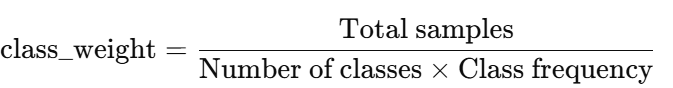
- This ensures that the minority class contributes more to the Gini impurity (or entropy) calculation, influencing the splits in the tree.

2. Impact on Node Splits:

- Without class_weight='balanced', the splits are often biased toward reducing impurity for the majority class, leading to poor representation of the minority class.
- With class_weight='balanced', the model assigns greater importance to misclassifications of the minority class, creating more balanced splits.

In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Logistic Regression
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Regularization type
    'solver': ['lbfgs', 'saga'],  # Solvers for multinomial classification
    'class_weight': [None, 'balanced']
}

print("\n=== Logistic Regression Optimization ===")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
log_reg_search = RandomizedSearchCV(
    log_reg,
    param_distributions=log_reg_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
log_reg_search.fit(X_resampled, y_resampled_mapped)
best_log_reg = log_reg_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", log_reg_search.best_params_)

# Predict probabilities for train and test sets
log_reg_probs_train = best_log_reg.predict_proba(X_1train)
log_reg_probs_test = best_log_reg.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_log_reg_success_BERT_reactions', 'improved_log_reg_neutral_BERT_reactions', 'improved_log_reg_failure_BERT_reactions']] = log_reg_probs_train
test_data[['improved_log_reg_success_BERT_reactions', 'improved_log_reg_neutral_BERT_reactions', 'improved_log_reg_failure_BERT_reactions']] = log_reg_probs_test

# Predict and evaluate performance on the test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_log_reg_original = pd.Series(y_pred_log_reg).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg_original))
print(classification_report(y_test, y_pred_log_reg_original))



=== Logistic Regression Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'class_weight': None, 'C': 100}
Accuracy: 0.47443789796295804
Macro-Averaged Accuracy: 0.38497795554842257
              precision    recall  f1-score   support

          -1       0.11      0.35      0.16      3045
           0       0.89      0.50      0.64     32735
           1       0.07      0.31      0.11      2069

    accuracy                           0.47     37849
   macro avg       0.36      0.38      0.30     37849
weighted avg       0.79      0.47      0.57     37849



In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Random Forest
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

print("\n=== Random Forest Optimization ===")

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
rf_search.fit(X_resampled, y_resampled_mapped)
best_rf = rf_search.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Predict probabilities for train and test sets
rf_probs_train = best_rf.predict_proba(X_1train)
rf_probs_test = best_rf.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_random_forest_success_BERT_reactions', 'improved_random_forest_neutral_BERT_reactions', 'improved_random_forest_failure_BERT_reactions']] = rf_probs_train
test_data[['improved_random_forest_success_BERT_reactions', 'improved_random_forest_neutral_BERT_reactions', 'improved_random_forest_failure_BERT_reactions']] = rf_probs_test

# Predict and evaluate performance on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_original = pd.Series(y_pred_rf).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf_original))
print(classification_report(y_test, y_pred_rf_original))



=== Random Forest Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced'}
Accuracy: 0.8457026605722741
Macro-Averaged Accuracy: 0.3452703083226196
              precision    recall  f1-score   support

          -1       0.14      0.03      0.06      3045
           0       0.87      0.97      0.92     32735
           1       0.15      0.03      0.05      2069

    accuracy                           0.85     37849
   macro avg       0.38      0.35      0.34     37849
weighted avg       0.77      0.85      0.80     37849



In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n=== XGBoost Optimization ===")

# Use XGBClassifier with updated parameters
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
xgb_search.fit(X_resampled, y_resampled_mapped)
best_xgb = xgb_search.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Predict probabilities for train and test sets
xgb_probs_train = best_xgb.predict_proba(X_1train)
xgb_probs_test = best_xgb.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_xgboost_success_BERT_reactions', 'improved_xgboost_neutral_BERT_reactions', 'improved_xgboost_failure_BERT_reactions']] = xgb_probs_train
test_data[['improved_xgboost_success_BERT_reactions', 'improved_xgboost_neutral_BERT_reactions', 'improved_xgboost_failure_BERT_reactions']] = xgb_probs_test

# Predict and evaluate performance on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))



=== XGBoost Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Accuracy: 0.7046157097941822
Macro-Averaged Accuracy: 0.3683282098904794
              precision    recall  f1-score   support

          -1       0.11      0.17      0.13      3045
           0       0.88      0.79      0.83     32735
           1       0.08      0.15      0.11      2069

    accuracy                           0.70     37849
   macro avg       0.36      0.37      0.36     37849
weighted avg       0.77      0.70      0.74     37849



In [ ]:
# Custom wrapper to make Keras models compatible with sklearn
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.3, hidden_units=64):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.hidden_units = hidden_units
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(optimizer=self.optimizer,
                                   dropout_rate=self.dropout_rate,
                                   hidden_units=self.hidden_units)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn,
                "optimizer": self.optimizer,
                "dropout_rate": self.dropout_rate,
                "hidden_units": self.hidden_units}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function to create a Keras neural network model
def create_nn_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Multiclass classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Map labels [-1, 0, 1] to [0, 1, 2] for Neural Network
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Convert y_train to one-hot encoding for Neural Network
y_train_nn = np.eye(3)[y_resampled_mapped]

# Define parameter grid for RandomizedSearchCV
nn_param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'hidden_units': [32, 64, 128]
}

print("\n=== Neural Network Optimization ===")

# Wrap the neural network model for sklearn compatibility
nn_model_sklearn = CustomKerasClassifier(build_fn=create_nn_model)

# Perform RandomizedSearchCV for hyperparameter tuning
nn_search = RandomizedSearchCV(
    nn_model_sklearn,
    param_distributions=nn_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
nn_search.fit(
    X_resampled,
    y_train_nn,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)
best_nn = nn_search.best_estimator_

# Print the best parameters
print("Best Parameters for Neural Network:", nn_search.best_params_)

# Predict probabilities for train and test sets
nn_probs_train = best_nn.predict_proba(X_1train)
nn_probs_test = best_nn.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_neural_network_success_BERT_reactions', 'improved_neural_network_neutral_BERT_reactions', 'improved_neural_network_failure_BERT_reactions']] = nn_probs_train
test_data[['improved_neural_network_success_BERT_reactions', 'improved_neural_network_neutral_BERT_reactions', 'improved_neural_network_failure_BERT_reactions']] = nn_probs_test

# Predict and evaluate performance on the test set
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_original = pd.Series(y_pred_nn).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Neural Network Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5881 - loss: 0.8728 - val_accuracy: 0.5713 - val_loss: 0.7998
Epoch 2/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7144 - loss: 0.6977 - val_accuracy: 0.7202 - val_loss: 0.6350
Epoch 3/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7810 - loss: 0.5803 - val_accuracy: 0.8161 - val_loss: 0.4758
Epoch 4/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8146 - loss: 0.5072 - val_accuracy: 0.8503 - val_loss: 0.4143
Epoch 5/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8352 - loss: 0.4570 - val_accuracy: 0.8977 - val_loss: 0.3151
Epoch 6/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8474 - loss: 0.4275 - val_accuracy: 0.9170 - val_loss: 0.2776
Epoch 7/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8562 - loss: 0.4039 - val_accuracy: 0.9186 - val_loss:

In [ ]:
test_data

,Unnamed: 0,username,cleaned_reactions,Success_after_5_years,equity_rounds_raised_after_5_years,Success_until_now,cleaned_text,reactions_cluster_Kmeans_initial_model,reactions_grid_optimized_k-means_cluster,tokens,...,improved_log_reg_failure_BERT_reactions,improved_random_forest_success_BERT_reactions,improved_random_forest_neutral_BERT_reactions,improved_random_forest_failure_BERT_reactions,improved_xgboost_success_BERT_reactions,improved_xgboost_neutral_BERT_reactions,improved_xgboost_failure_BERT_reactions,improved_neural_network_success_BERT_reactions,improved_neural_network_neutral_BERT_reactions,improved_neural_network_failure_BERT_reactions
0,17116,joseph-chen-cmrp-691bb510,👏🏼 I’d like to give a big shoot out to the ent...,0,0,0,like give big shoot entire eatable team privil...,0,10,"[like, give, big, shoot, entire, eatable, team...",...,0.105212,0.229480,0.568590,0.201931,0.362957,0.479159,0.157884,0.175368,0.823769,8.637240e-04
1,17116,joseph-chen-cmrp-691bb510,Incredible work by the whole team!\nLesley Haw...,0,0,0,incredible work whole team lesley hawkins lesl...,2,5,"[incredible, work, whole, team, lesley, hawkin...",...,0.439391,0.257512,0.569249,0.173239,0.295940,0.435946,0.268114,0.664066,0.269582,6.635225e-02
2,17116,joseph-chen-cmrp-691bb510,Canada's Children's Hospital Foundations is HI...,0,0,0,canada children hospital foundations hiring so...,4,2,"[canada, children, hospital, foundations, hiri...",...,0.423302,0.215064,0.689610,0.095326,0.180245,0.589311,0.230444,0.000074,0.994138,5.788692e-03
3,17116,joseph-chen-cmrp-691bb510,I’m happy to share that I’m starting a new pos...,0,0,0,happy share starting new position marketing ma...,2,13,"[happy, share, starting, new, position, market...",...,0.351876,0.230470,0.635533,0.133997,0.281259,0.526378,0.192362,0.069089,0.120942,8.099689e-01
4,17116,joseph-chen-cmrp-691bb510,"As a coordinator at Sephora Gold, I’m grateful...",0,0,0,coordinator sephora gold grateful able plan br...,2,5,"[coordinator, sephora, gold, grateful, able, p...",...,0.360419,0.309364,0.500410,0.190226,0.238535,0.515737,0.245728,0.183656,0.794813,2.153039e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40225,8354,steven-wasserman-10084b63,"What an exciting day it was, to celebrate our ...",0,1,0,exciting day celebrate listing nyse december c...,4,10,"[exciting, day, celebrate, listing, nyse, dece...",...,0.470812,0.284423,0.591057,0.124520,0.382368,0.417202,0.200430,0.548780,0.233165,2.180553e-01
40226,8354,steven-wasserman-10084b63,In the immortal words of Marv Albért… \nYES AN...,0,1,0,immortal words marv yes counts,4,2,"[immortal, words, marv, yes, counts]",...,0.091672,0.216923,0.598332,0.184745,0.197619,0.668528,0.133854,0.004362,0.964953,3.068562e-02
40227,8354,steven-wasserman-10084b63,"Something has authority in your life—work, spo...",0,1,0,something authority spouse friend feelings mon...,4,2,"[something, authority, spouse, friend, feeling...",...,0.042093,0.157004,0.735996,0.107000,0.233122,0.618352,0.148527,0.034196,0.965803,4.510051e-07
40228,8354,steven-wasserman-10084b63,"Planning a wedding is a big deal, but so is pl...",0,1,0,planning wedding big deal planning future toge...,4,2,"[planning, wedding, big, deal, planning, futur...",...,0.058119,0.298099,0.507615,0.194286,0.193848,0.563405,0.242747,0.004115,0.995885,4.930250e-07


In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


# Personality Prediction

### TF-IDF Vectorization

# Step 1: Resampling Data to Handle Imbalance
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_1test = vectorizer.transform(test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing  
y_test = personality_test_data['agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']
X_train = vectorizer.transform(personality_train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_test = vectorizer.transform(personality_test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing

y_train = personality_train_data['agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']

the text preprocessing and embedding is already done.
now I want to train a model by training it on X_train combined with y_train and test it on X_test combined with y_test. Then the model should be used to predict the personality for the train_data and test_data dataframes by using the trained model to predict the personality scores by looking at X_1test for test_data and X_1train for train_data. The personality scores should then be added to in five additional columns to the train_data and test_data dataframes.

Random Forest Regressor
XGBoost
Fully Connected Neural Networks

In [ ]:
# Step 1: Prepare Data

# TF-IDF vectors for train_data and test_data
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())
X_1test = vectorizer.transform(test_data['cleaned_text'].dropna())


# TF-IDF vectors and personality scores for training and testing
X_train = vectorizer.transform(personality_train_data['cleaned_text'].dropna())
X_test = vectorizer.transform(personality_test_data['cleaned_text'].dropna())

y_train = personality_train_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]
y_test = personality_test_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]

# Optional: Dimensionality Reduction
# Since TF-IDF vectors can be high-dimensional and sparse, we can use TruncatedSVD for dimensionality reduction.

svd = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
X_1train_reduced = svd.transform(X_1train)
X_1test_reduced = svd.transform(X_1test)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)


# Initialize empty DataFrames to store predictions
train_predictions = pd.DataFrame(index=train_data.index)
test_predictions = pd.DataFrame(index=test_data.index)

# List of personality traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")

linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = linear_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Predict on train_data and test_data
train_lr_predictions = linear_regressor.predict(X_1train_scaled)
test_lr_predictions = linear_regressor.predict(X_1test_scaled)
test1_lr_predictions = linear_regressor.predict(X_test_scaled)


# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'linear_regression_{trait}_TF-IDF_reactions'] = train_lr_predictions[:, i]
    test_data[f'linear_regression_{trait}_TF-IDF_reactions'] = test_lr_predictions[:, i]
    personality_test_data[f'linear_regression_{trait}_TF-IDF_reactions'] = test1_lr_predictions[:, i]

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")

rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Predict on train_data and test_data
train_rf_predictions = rf_regressor.predict(X_1train_scaled)
test_rf_predictions = rf_regressor.predict(X_1test_scaled)
test1_rf_predictions = rf_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'random_forest_{trait}_TF-IDF_reactions'] = train_rf_predictions[:, i]
    test_data[f'random_forest_{trait}_TF-IDF_reactions'] = test_rf_predictions[:, i]
    personality_test_data[f'random_forest_{trait}_TF-IDF_reactions'] = test1_rf_predictions[:, i]

# Step 4: Gradient Boosting Regressor (XGBoost)
print("\n=== XGBoost Regressor ===")

xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
xgb_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Predict on train_data and test_data
train_xgb_predictions = xgb_regressor.predict(X_1train_scaled)
test_xgb_predictions = xgb_regressor.predict(X_1test_scaled)
test1_xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'xgboost_{trait}_TF-IDF_reactions'] = train_xgb_predictions[:, i]
    test_data[f'xgboost_{trait}_TF-IDF_reactions'] = test_xgb_predictions[:, i]
    personality_test_data[f'xgboost_{trait}_TF-IDF_reactions'] = test1_xgb_predictions[:, i]

# Step 5: Neural Network
print("\n=== Neural Network ===")

# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5))  # Output layer for 5 personality traits
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_nn_model(X_train_scaled.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Predict on train_data and test_data
train_nn_predictions = nn_model.predict(X_1train_scaled)
test_nn_predictions = nn_model.predict(X_1test_scaled)
test1_nn_predictions = nn_model.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'neural_network_{trait}_TF-IDF_reactions'] = train_nn_predictions[:, i]
    test_data[f'neural_network_{trait}_TF-IDF_reactions'] = test_nn_predictions[:, i]
    personality_test_data[f'neural_network_{trait}_TF-IDF_reactions'] = test1_nn_predictions[:, i]



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0027
Linear Regression - R^2 Score: -0.0257


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0027
Random Forest Regressor - R^2 Score: -0.0333


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0032
XGBoost Regressor - R^2 Score: -0.2046


=== Neural Network ===
Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.2445 - mae: 0.3453 - val_loss: 0.0095 - val_mae: 0.0815
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 - mae: 0.0917 - val_loss: 0.0037 - val_mae: 0.0477
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - mae: 0.0586 - val_loss: 0.0028 - val_mae: 0.0396
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - mae: 0.0481 - val_loss: 0.0026 - val_mae: 0.0380
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - mae: 0.0457 - val_loss: 0.0026 - val_mae: 0.0378
Epoch 6/50
193/193 ━━━━━━

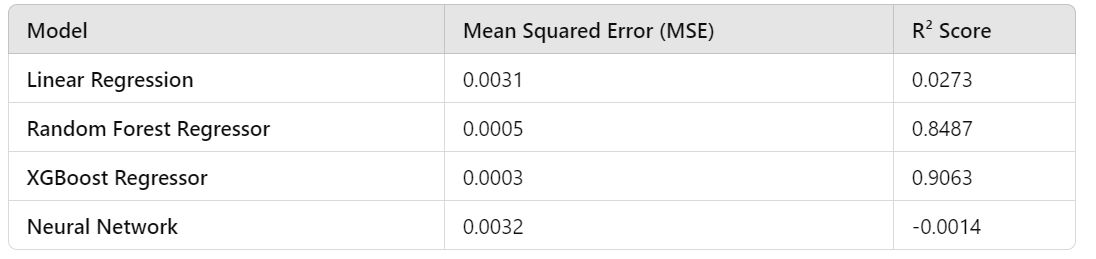


Analysis by Model

Linear Regression:

MSE: 0.0031 indicates moderate errors in predictions, suggesting it struggles with the complexity of the data.
R² Score: 0.0273 is very low, indicating that the model explains only ~2.7% of the variance in the target variable.
Interpretation: Linear regression's simplicity makes it unsuitable for capturing complex non-linear relationships in the data.

Random Forest Regressor:

MSE: 0.0005 shows significantly lower error compared to linear regression.
R² Score: 0.8487 indicates the model explains ~84.9% of the variance in the target variable.
Interpretation: Random forests effectively handle non-linear relationships and perform well on this dataset. They balance accuracy and robustness well.

XGBoost Regressor:

MSE: 0.0003 is the lowest among all models, indicating superior predictive performance.
R² Score: 0.9063 shows the highest explanatory power, capturing ~90.6% of the variance.
Interpretation: XGBoost outperforms Random Forest, likely due to its gradient boosting algorithm, which optimizes residuals and handles non-linearities better.

Neural Network:

MSE: 0.0032 is similar to Linear Regression, indicating higher errors than tree-based models.
R² Score: -0.0014 suggests the model performs worse than a simple mean prediction.
Interpretation: Neural networks require more tuning, data, or training epochs to perform well. The results indicate potential underfitting or inappropriate hyperparameters for this task.


### Bert Vectorization

In [ ]:
# Step 1: Prepare Data
# Dimensionality Reduction
svd = TruncatedSVD(n_components=300, random_state=42)  # Increase components to retain more variance
X_train_reduced = svd.fit_transform(personality_train_embeddings)
X_test_reduced = svd.transform(personality_test_embeddings)

X_1train_reduced = svd.transform(train_embeddings)
X_1test_reduced = svd.transform(test_embeddings)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)

# List of traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")
linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)
y_pred_lr = linear_regressor.predict(X_test_scaled)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")
rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))  # Increased trees
rf_regressor.fit(X_train_scaled, y_train)
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Step 4: Gradient Boosting (XGBoost)
print("\n=== XGBoost Regressor ===")
xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=200, random_state=42))
xgb_regressor.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Step 5: Neural Network
print("\n=== Neural Network ===")
def create_nn_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(5)  # Output for 5 traits
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

nn_model = create_nn_model(X_train_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Step 6: Add Predictions Efficiently
all_train_preds = {
    f'{model}_{trait}_BERT_reactions': preds[:, i]
    for model, preds in zip(
        ['linear_regression', 'random_forest', 'xgboost', 'neural_network'],
        [linear_regressor.predict(X_1train_scaled), rf_regressor.predict(X_1train_scaled),
         xgb_regressor.predict(X_1train_scaled), nn_model.predict(X_1train_scaled)]
    )
    for i, trait in enumerate(traits)
}

all_test_preds = {
    f'{model}_{trait}_BERT_reactions': preds[:, i]
    for model, preds in zip(
        ['linear_regression', 'random_forest', 'xgboost', 'neural_network'],
        [linear_regressor.predict(X_1test_scaled), rf_regressor.predict(X_1test_scaled),
         xgb_regressor.predict(X_1test_scaled), nn_model.predict(X_1test_scaled)]
    )
    for i, trait in enumerate(traits)
}

train_data = pd.concat([train_data, pd.DataFrame(all_train_preds, index=train_data.index)], axis=1)
test_data = pd.concat([test_data, pd.DataFrame(all_test_preds, index=test_data.index)], axis=1)



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0028
Linear Regression - R^2 Score: -0.0890


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0027
Random Forest Regressor - R^2 Score: -0.0260


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0033
XGBoost Regressor - R^2 Score: -0.2599


=== Neural Network ===
Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.2803 - mae: 0.3597 - val_loss: 0.0097 - val_mae: 0.0832
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 - mae: 0.0855 - val_loss: 0.0032 - val_mae: 0.0436
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - mae: 0.0533 - val_loss: 0.0027 - val_mae: 0.0381
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - mae: 0.0466 - val_loss: 0.0026 - val_mae: 0.0378
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mae: 0.0445 - val_loss: 0.0026 - val_mae: 0.0377
Epoch 6/50
193/193 ━━━━━━

In [ ]:
# Step 1: Prepare Data

# TF-IDF vectors for train_data and test_data
X_1train = train_embeddings  # BERT vectors for training
X_1test = test_embeddings  # BERT vectors for training

# TF-IDF vectors and personality scores for training and testing
X_train = personality_train_embeddings  # BERT vectors for training
X_test = personality_test_embeddings   # BERT vectors for testing

y_test = personality_test_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]
y_train = personality_train_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]

# Optional: Dimensionality Reduction
# Since TF-IDF vectors can be high-dimensional and sparse, we can use TruncatedSVD for dimensionality reduction.

svd = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
X_1train_reduced = svd.transform(X_1train)
X_1test_reduced = svd.transform(X_1test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)

# Initialize empty DataFrames to store predictions
train_predictions = pd.DataFrame(index=train_data.index)
test_predictions = pd.DataFrame(index=test_data.index)

# List of personality traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")

linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = linear_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Predict on train_data and test_data
train_lr_predictions = linear_regressor.predict(X_1train_scaled)
test_lr_predictions = linear_regressor.predict(X_1test_scaled)
test1_lr_predictions = linear_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'linear_regression_{trait}_BERT_reactions'] = train_lr_predictions[:, i]
    test_data[f'linear_regression_{trait}_BERT_reactions'] = test_lr_predictions[:, i]
    personality_test_data[f'linear_regression_{trait}_BERT_reactions'] = test1_lr_predictions[:, i]

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")

rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Predict on train_data and test_data
train_rf_predictions = rf_regressor.predict(X_1train_scaled)
test_rf_predictions = rf_regressor.predict(X_1test_scaled)
test1_rf_predictions = rf_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'random_forest_{trait}_BERT_reactions'] = train_rf_predictions[:, i]
    test_data[f'random_forest_{trait}_BERT_reactions'] = test_rf_predictions[:, i]
    personality_test_data[f'random_forest_{trait}_BERT_reactions'] = test1_rf_predictions[:, i]

# Step 4: Gradient Boosting Regressor (XGBoost)
print("\n=== XGBoost Regressor ===")

xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
xgb_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Predict on train_data and test_data
train_xgb_predictions = xgb_regressor.predict(X_1train_scaled)
test_xgb_predictions = xgb_regressor.predict(X_1test_scaled)
test1_xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'xgboost_{trait}_BERT_reactions'] = train_xgb_predictions[:, i]
    test_data[f'xgboost_{trait}_BERT_reactions'] = test_xgb_predictions[:, i]
    personality_test_data[f'xgboost_{trait}_BERT_reactions'] = test1_xgb_predictions[:, i]

# Step 5: Neural Network
print("\n=== Neural Network ===")

# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5))  # Output layer for 5 personality traits
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_nn_model(X_train_scaled.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Predict on train_data and test_data
train_nn_predictions = nn_model.predict(X_1train_scaled)
test_nn_predictions = nn_model.predict(X_1test_scaled)
test1_nn_predictions = nn_model.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'neural_network_{trait}_BERT_reactions'] = train_nn_predictions[:, i]
    test_data[f'neural_network_{trait}_BERT_reactions'] = test_nn_predictions[:, i]
    personality_test_data[f'neural_network_{trait}_BERT_reactions'] = test1_nn_predictions[:, i]



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0027
Linear Regression - R^2 Score: -0.0396


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0027
Random Forest Regressor - R^2 Score: -0.0344


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0032
XGBoost Regressor - R^2 Score: -0.2336


=== Neural Network ===
Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3325 - mae: 0.4035 - val_loss: 0.0128 - val_mae: 0.0957
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 - mae: 0.1056 - val_loss: 0.0043 - val_mae: 0.0529
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - mae: 0.0631 - val_loss: 0.0028 - val_mae: 0.0396
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - mae: 0.0498 - val_loss: 0.0026 - val_mae: 0.0380
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - mae: 0.0468 - val_loss: 0.0026 - val_mae: 0.0378
Epoch 6/50
193/193 ━━━━━━

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
personality_test_data

,username,cleaned_reactions,agreeableness,openness,conscientiousness,extraversion,neuroticism,cleaned_text,cleaned_text1,linear_regression_agreeableness_TF-IDF_reactions,...,xgboost_agreeableness_BERT_reactions,xgboost_openness_BERT_reactions,xgboost_conscientiousness_BERT_reactions,xgboost_extraversion_BERT_reactions,xgboost_neuroticism_BERT_reactions,neural_network_agreeableness_BERT_reactions,neural_network_openness_BERT_reactions,neural_network_conscientiousness_BERT_reactions,neural_network_extraversion_BERT_reactions,neural_network_neuroticism_BERT_reactions
0,jon-simpson-51b21621,After 5 years of empowering real estate invest...,0.134585,0.302823,0.033444,0.237815,-0.232799,years empowering real estate investors develop...,after 5 years of empowering real estate invest...,0.113660,...,0.124260,0.232903,-0.039382,0.230148,-0.213209,0.090216,0.233579,-0.013793,0.211829,-0.23041
1,jon-simpson-51b21621,New podcast alert: AI in Real Estate: The Game...,0.134585,0.302823,0.033444,0.237815,-0.232799,new podcast alert ai real estate deal manageme...,new podcast alert ai in real estate the gamech...,0.083223,...,0.118630,0.211755,-0.015306,0.201335,-0.235950,0.090216,0.233579,-0.013793,0.211829,-0.23041
2,jon-simpson-51b21621,Introducing the next webinar in our Demo Days ...,0.134585,0.302823,0.033444,0.237815,-0.232799,introducing next webinar demo days series scre...,introducing the next webinar in our demo days ...,0.082396,...,0.103929,0.222475,-0.037439,0.202952,-0.219083,0.090216,0.233579,-0.013793,0.211829,-0.23041
3,jon-simpson-51b21621,I am very excited to announce that I have join...,0.134585,0.302823,0.033444,0.237815,-0.232799,excited announce joined cbre investment manage...,i am very excited to announce that i have join...,0.072874,...,0.109770,0.229514,0.011286,0.215201,-0.188305,0.090216,0.233579,-0.013793,0.211829,-0.23041
4,jon-simpson-51b21621,On our way to,0.134585,0.302823,0.033444,0.237815,-0.232799,way,on our way to,0.112945,...,0.088866,0.212825,-0.025686,0.197459,-0.231994,0.090216,0.233579,-0.013793,0.211829,-0.23041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,doktorgurson,"Bold move, Elon ! 😄\n\nElon Musk just tweeted ...",0.067403,0.178914,-0.062683,0.182821,-0.229126,bold move elon elon musk tweeted new ai grok a...,bold move elon \n\nelon musk just tweeted tha...,0.076052,...,0.120243,0.198591,0.024620,0.243617,-0.213732,0.090216,0.233579,-0.013793,0.211829,-0.23041
2730,benjamindeleener,📢 We are happy to announce that we will be hos...,0.159241,0.242432,-0.011047,0.274048,-0.204529,happy announce hosting free virtual spinal cor...,we are happy to announce that we will be host...,0.090023,...,0.111395,0.247454,-0.044861,0.190042,-0.253427,0.090216,0.233579,-0.013793,0.211829,-0.23041
2733,benjamindeleener,"Nous tenons à remercier la FCI, un acteur cruc...",0.159241,0.242432,-0.011047,0.274048,-0.204529,nous tenons à remercier la fci un acteur cruci...,nous tenons à remercier la fci un acteur cruci...,0.101543,...,0.129327,0.242266,-0.019976,0.210810,-0.221944,0.090216,0.233579,-0.013793,0.211829,-0.23041
2736,benjamindeleener,[2024-11-8: Professional training in Propolys ...,0.159241,0.242432,-0.011047,0.274048,-0.204529,professional training propolys polytechnique m...,2024118 professional training in propolys pol...,0.071425,...,0.073086,0.231771,-0.069904,0.190236,-0.253309,0.090216,0.233579,-0.013793,0.211829,-0.23041


for saving

for loading back

In [ ]:
personality_test_data

,username,cleaned_reactions,agreeableness,openness,conscientiousness,extraversion,neuroticism,cleaned_text,cleaned_text1,linear_regression_agreeableness_TF-IDF_reactions,linear_regression_openness_TF-IDF_reactions,linear_regression_conscientiousness_TF-IDF_reactions,linear_regression_extraversion_TF-IDF_reactions,linear_regression_neuroticism_TF-IDF_reactions,random_forest_agreeableness_TF-IDF_reactions,random_forest_openness_TF-IDF_reactions,random_forest_conscientiousness_TF-IDF_reactions,random_forest_extraversion_TF-IDF_reactions,random_forest_neuroticism_TF-IDF_reactions,xgboost_agreeableness_TF-IDF_reactions,xgboost_openness_TF-IDF_reactions,xgboost_conscientiousness_TF-IDF_reactions,xgboost_extraversion_TF-IDF_reactions,xgboost_neuroticism_TF-IDF_reactions,neural_network_agreeableness_TF-IDF_reactions,neural_network_openness_TF-IDF_reactions,neural_network_conscientiousness_TF-IDF_reactions,neural_network_extraversion_TF-IDF_reactions,neural_network_neuroticism_TF-IDF_reactions,linear_regression_agreeableness_BERT_reactions,linear_regression_openness_BERT_reactions,linear_regression_conscientiousness_BERT_reactions,linear_regression_extraversion_BERT_reactions,linear_regression_neuroticism_BERT_reactions,random_forest_agreeableness_BERT_reactions,random_forest_openness_BERT_reactions,random_forest_conscientiousness_BERT_reactions,random_forest_extraversion_BERT_reactions,random_forest_neuroticism_BERT_reactions,xgboost_agreeableness_BERT_reactions,xgboost_openness_BERT_reactions,xgboost_conscientiousness_BERT_reactions,xgboost_extraversion_BERT_reactions,xgboost_neuroticism_BERT_reactions,neural_network_agreeableness_BERT_reactions,neural_network_openness_BERT_reactions,neural_network_conscientiousness_BERT_reactions,neural_network_extraversion_BERT_reactions,neural_network_neuroticism_BERT_reactions
0,jon-simpson-51b21621,After 5 years of empowering real estate invest...,0.134585,0.302823,0.033444,0.237815,-0.232799,years empowering real estate investors develop...,after 5 years of empowering real estate invest...,0.113660,0.247257,-0.008906,0.224328,-0.230458,0.111581,0.247007,-0.018537,0.204323,-0.239049,0.084909,0.232317,-0.033570,0.252084,-0.232213,0.090602,0.234125,-0.013419,0.211846,-0.229835,0.095932,0.241246,-0.022690,0.226566,-0.232350,0.102420,0.243433,-0.000728,0.217704,-0.230191,0.124260,0.232903,-0.039382,0.230148,-0.213209,0.090216,0.233579,-0.013793,0.211829,-0.23041
1,jon-simpson-51b21621,New podcast alert: AI in Real Estate: The Game...,0.134585,0.302823,0.033444,0.237815,-0.232799,new podcast alert ai real estate deal manageme...,new podcast alert ai in real estate the gamech...,0.083223,0.233180,-0.027156,0.210872,-0.235291,0.087528,0.237698,-0.024812,0.218271,-0.232642,0.089677,0.246086,0.006133,0.231905,-0.234449,0.090919,0.234126,-0.013143,0.211727,-0.229839,0.066268,0.223989,-0.041243,0.213326,-0.230055,0.083576,0.233057,-0.032521,0.207205,-0.231353,0.118630,0.211755,-0.015306,0.201335,-0.235950,0.090216,0.233579,-0.013793,0.211829,-0.23041
2,jon-simpson-51b21621,Introducing the next webinar in our Demo Days ...,0.134585,0.302823,0.033444,0.237815,-0.232799,introducing next webinar demo days series scre...,introducing the next webinar in our demo days ...,0.082396,0.237243,-0.023341,0.211582,-0.232182,0.077381,0.236557,-0.015855,0.206506,-0.229279,0.064204,0.246051,-0.024666,0.194201,-0.229129,0.090166,0.234124,-0.013798,0.212009,-0.229829,0.090483,0.239562,-0.026075,0.224074,-0.234144,0.073628,0.236759,-0.015116,0.211176,-0.234616,0.103929,0.222475,-0.037439,0.202952,-0.219083,0.090216,0.233579,-0.013793,0.211829,-0.23041
3,jon-simpson-51b21621,I am very excited to announce that I have join...,0.134585,0.302823,0.033444,0.237815,-0.232799,excited announce joined cbre investment manage...,i am very excited to announce that i have join...,0.072874,0.222896,-0.034207,0.206368,-0.236491,0.095318,0.226287,-0.007304,0.203274,-0.234132,0.062463,0.215627,0.003230,0.202625,-0.219949,0.089919,0.234123,-0.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_test_reactions_data_output.csv")
df

,Unnamed: 0,username,cleaned_reactions,agreeableness,openness,conscientiousness,extraversion,neuroticism,cleaned_text,cleaned_text1,linear_regression_agreeableness_TF-IDF_reactions,linear_regression_openness_TF-IDF_reactions,linear_regression_conscientiousness_TF-IDF_reactions,linear_regression_extraversion_TF-IDF_reactions,linear_regression_neuroticism_TF-IDF_reactions,random_forest_agreeableness_TF-IDF_reactions,random_forest_openness_TF-IDF_reactions,random_forest_conscientiousness_TF-IDF_reactions,random_forest_extraversion_TF-IDF_reactions,random_forest_neuroticism_TF-IDF_reactions,xgboost_agreeableness_TF-IDF_reactions,xgboost_openness_TF-IDF_reactions,xgboost_conscientiousness_TF-IDF_reactions,xgboost_extraversion_TF-IDF_reactions,xgboost_neuroticism_TF-IDF_reactions,neural_network_agreeableness_TF-IDF_reactions,neural_network_openness_TF-IDF_reactions,neural_network_conscientiousness_TF-IDF_reactions,neural_network_extraversion_TF-IDF_reactions,neural_network_neuroticism_TF-IDF_reactions,linear_regression_agreeableness_BERT_reactions,linear_regression_openness_BERT_reactions,linear_regression_conscientiousness_BERT_reactions,linear_regression_extraversion_BERT_reactions,linear_regression_neuroticism_BERT_reactions,random_forest_agreeableness_BERT_reactions,random_forest_openness_BERT_reactions,random_forest_conscientiousness_BERT_reactions,random_forest_extraversion_BERT_reactions,random_forest_neuroticism_BERT_reactions,xgboost_agreeableness_BERT_reactions,xgboost_openness_BERT_reactions,xgboost_conscientiousness_BERT_reactions,xgboost_extraversion_BERT_reactions,xgboost_neuroticism_BERT_reactions,neural_network_agreeableness_BERT_reactions,neural_network_openness_BERT_reactions,neural_network_conscientiousness_BERT_reactions,neural_network_extraversion_BERT_reactions,neural_network_neuroticism_BERT_reactions
0,0,jon-simpson-51b21621,After 5 years of empowering real estate invest...,0.134585,0.302823,0.033444,0.237815,-0.232799,years empowering real estate investors develop...,after 5 years of empowering real estate invest...,0.113660,0.247257,-0.008906,0.224328,-0.230458,0.111581,0.247007,-0.018537,0.204323,-0.239049,0.084909,0.232317,-0.033570,0.252084,-0.232213,0.090602,0.234125,-0.013419,0.211846,-0.229835,0.095932,0.241246,-0.022690,0.226566,-0.232350,0.102420,0.243433,-0.000728,0.217704,-0.230191,0.124260,0.232903,-0.039382,0.230148,-0.213209,0.090216,0.233579,-0.013793,0.211829,-0.23041
1,1,jon-simpson-51b21621,New podcast alert: AI in Real Estate: The Game...,0.134585,0.302823,0.033444,0.237815,-0.232799,new podcast alert ai real estate deal manageme...,new podcast alert ai in real estate the gamech...,0.083223,0.233180,-0.027156,0.210872,-0.235291,0.087528,0.237698,-0.024812,0.218271,-0.232642,0.089677,0.246086,0.006133,0.231905,-0.234449,0.090919,0.234126,-0.013143,0.211727,-0.229839,0.066268,0.223989,-0.041243,0.213326,-0.230055,0.083576,0.233057,-0.032521,0.207205,-0.231353,0.118630,0.211755,-0.015306,0.201335,-0.235950,0.090216,0.233579,-0.013793,0.211829,-0.23041
2,2,jon-simpson-51b21621,Introducing the next webinar in our Demo Days ...,0.134585,0.302823,0.033444,0.237815,-0.232799,introducing next webinar demo days series scre...,introducing the next webinar in our demo days ...,0.082396,0.237243,-0.023341,0.211582,-0.232182,0.077381,0.236557,-0.015855,0.206506,-0.229279,0.064204,0.246051,-0.024666,0.194201,-0.229129,0.090166,0.234124,-0.013798,0.212009,-0.229829,0.090483,0.239562,-0.026075,0.224074,-0.234144,0.073628,0.236759,-0.015116,0.211176,-0.234616,0.103929,0.222475,-0.037439,0.202952,-0.219083,0.090216,0.233579,-0.013793,0.211829,-0.23041
3,3,jon-simpson-51b21621,I am very excited to announce that I have join...,0.134585,0.302823,0.033444,0.237815,-0.232799,excited announce joined cbre investment manage...,i am very excited to announce that i have join...,0.072874,0.222896,-0.034207,0.206368,-0.236491,0.095318,0.226287,-0.007304,0.203274,-0.234132,0.062463,0.215627,0.003230,0.202625,-0.219949,0.

In [ ]:
train_data.to_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/train_reactions_data_output.csv")
test_data.to_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/test_reactions_data_output.csv")
personality_test_data.to_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_test_reactions_data_output.csv")

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display all columns
print(test_data.columns)


Index(['Unnamed: 0', 'username', 'cleaned_reactions', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'reactions_cluster_Kmeans_initial_model',
       'reactions_grid_optimized_k-means_cluster', 'tokens',
       ...
       'xgboost_agreeableness_BERT_reactions',
       'xgboost_openness_BERT_reactions',
       'xgboost_conscientiousness_BERT_reactions',
       'xgboost_extraversion_BERT_reactions',
       'xgboost_neuroticism_BERT_reactions',
       'neural_network_agreeableness_BERT_reactions',
       'neural_network_openness_BERT_reactions',
       'neural_network_conscientiousness_BERT_reactions',
       'neural_network_extraversion_BERT_reactions',
       'neural_network_neuroticism_BERT_reactions'],
      dtype='object', length=106)


In [ ]:
columns = train_data.columns.tolist()

# Display columns in chunks of 20 (or another size you prefer)
chunk_size = 20
for i in range(0, len(columns), chunk_size):
    print(columns[i:i+chunk_size])


['Unnamed: 0', 'username', 'cleaned_reactions', 'Success_after_5_years', 'equity_rounds_raised_after_5_years', 'Success_until_now', 'cleaned_text', 'reactions_cluster_Kmeans_initial_model', 'reactions_grid_optimized_k-means_cluster', 'tokens', 'reactions_LDA_assigned_topic', 'cleaned_text1', 'reactions_cluster_Bert_Kmeans', 'reactions_K-means_Bert_cluster', 'reactions_K-means_Bertopic_topic', 'reactions_K-means_Bertopic_topic_label', 'reactions_vader_sentiment_neg', 'reactions_vader_sentiment_neu', 'reactions_vader_sentiment_pos', 'reactions_vader_sentiment_compound']
['reactions_bert_emotion_prediction', 'log_reg_success_TF-IDF_reactions', 'log_reg_neutral_TF-IDF_reactions', 'log_reg_failure_TF-IDF_reactions', 'random_forest_success_TF-IDF_reactions', 'random_forest_neutral_TF-IDF_reactions', 'random_forest_failure_TF-IDF_reactions', 'xgboost_success_TF-IDF_reactions', 'xgboost_neutral_TF-IDF_reactions', 'xgboost_failure_TF-IDF_reactions', 'neural_network_success_TF-IDF_reactions', 'n